<a href="https://colab.research.google.com/github/shylitboi/Personal-Project/blob/main/%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%94%A5%EB%9F%AC%EB%8B%9D_6%EC%A1%B0_%EC%BD%94%EB%93%9C%ED%86%B5%ED%95%A9%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
crawl = pd.read_csv("/content/drive/MyDrive/Data/Crawl_final.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Data/Crawl_final.csv'

# 기본 전처리

In [ ]:
crawl.drop_duplicates(inplace=True)
crawl.drop(columns=['Tweet ID', 'URL'],axis=1,inplace=True)
crawl = crawl[crawl['Content'].notnull()]
crawl['Date'] = pd.to_datetime(crawl['Date'], errors='coerce').dt.floor('D')

In [ ]:
import re

def clean_text(text):
    if not isinstance(text, str):
        text = ""
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # URL 제거
    text = re.sub(r"@\w+|#\w+", "", text)                # 멘션, 해시태그 제거
    text = re.sub(r"[^\uAC00-\uD7A3a-zA-Z0-9\s]", "", text)  # 한글, 영문, 숫자, 공백만 남기기
    text = re.sub(r"\s+", " ", text).strip()             # 중복 공백 제거
    return text


crawl['clean_text'] = crawl['Content'].apply(clean_text)
crawl.head()

| 구간                   | 기간           |
| -------------------- | ------------ |
| 1. 윤대통령 파면 \~ 선거운동 전 | 4/5 \~ 5/11  |
| 2. 공식 선거운동 \~ 대선토론   | 5/12 \~ 5/26 |
| 3. 대선토론 이후 \~ 본투표 포함 | 5/27 \~ 6/3  |
| 4. 본투표 이후            | 6/4 이후       |


In [ ]:
def assign_period(date):
    if date <= pd.to_datetime('2025-05-11'):
        return '윤대통령 파면 ~ 선거운동 전'
    elif date <= pd.to_datetime('2025-05-26'):
        return '선거운동 ~ 대선토론'
    elif date <= pd.to_datetime('2025-06-02'):
        return '대선토론 이후 ~ 본투표'
    else:
        return '본투표 이후'

crawl['period'] = crawl['Date'].apply(assign_period)

In [ ]:
crawl = crawl[crawl['clean_text'].apply(lambda x: isinstance(x, str) and x.strip() != '')].copy() # 공백 제거

In [ ]:
crawl.sort_values(by='Date',inplace=True)

In [ ]:
keywords = ['이재명', '민주당', '내란척결', '내란 척결', '찢재명']
# 하나라도 포함된 경우 True
crawl['has_keyword'] = crawl['Content'].apply(
    lambda x: any(kw in str(x) for kw in keywords)
)
crawl_final = crawl[crawl['has_keyword']]
crawl_final.drop(columns=['has_keyword'],inplace=True)

In [ ]:
crawl_final.to_csv("X_crawling.csv",index=False)

# Vader

In [1]:
crawl_vader = crawl[crawl['has_keyword']]

NameError: name 'crawl' is not defined

In [ ]:
crawl_vader

,Content,Likes,Retweets,Replies,Quotes,Views,Date,clean_text,period,has_keyword
819,@Dokaijija 영수회담 또 요청할듯 \n쪼잖한 놈 이재명 ㅋㅋㅋㅋㅋ\n\n과...,0,0,0,0,23,2025-04-03,영수회담 또 요청할듯 쪼잖한 놈 이재명 과연 석열이는 피의자 이재명을 만날것인가,윤대통령 파면 ~ 선거운동 전,True
818,이 사람들이 정청래 너무 무시함. 무려 미대사관 테러했었음. 폭력적인 성향은 이재명...,7,4,0,0,1307,2025-04-03,이 사람들이 정청래 너무 무시함 무려 미대사관 테러했었음 폭력적인 성향은 이재명이랑...,윤대통령 파면 ~ 선거운동 전,True
820,"@Raoulian @ikeasajima 그쵸 탄핵 선고 ""후""니까... 이재명이냐 ...",1,0,1,0,118,2025-04-03,그쵸 탄핵 선고 후니까 이재명이냐 반이재명이냐 갖고 토론하겠죠,윤대통령 파면 ~ 선거운동 전,True
825,거짓말로 당선된 자는 오히려 윤석열!! \n어이없는 찐보수 정규재의 항변 왜 이재명...,0,0,0,0,50,2025-04-03,거짓말로 당선된 자는 오히려 윤석열 어이없는 찐보수 정규재의 항변 왜 이재명 출처,윤대통령 파면 ~ 선거운동 전,True
816,이재명이라는 사람에 대해 최근 일년간 지켜본 결과 지지받을만 하다는 결론\n그간 몰...,0,0,0,0,14,2025-04-03,이재명이라는 사람에 대해 최근 일년간 지켜본 결과 지지받을만 하다는 결론 그간 몰라...,윤대통령 파면 ~ 선거운동 전,True
...,...,...,...,...,...,...,...,...,...,...
47110,아근데아직 이재명대통령이란 단어가 안익숙함\n최소 지난대선때부터 계속 봐오던 정치인...,1,0,0,0,27,2025-06-04,아근데아직 이재명대통령이란 단어가 안익숙함 최소 지난대선때부터 계속 봐오던 정치인이...,본투표 이후,True
47109,트럼프가 이재명 개무시하니까 웃기긴 하네 ㅋㅋ,15,0,0,0,252,2025-06-04,트럼프가 이재명 개무시하니까 웃기긴 하네,본투표 이후,True
47121,루리웹 대가리 깨진 좌리웹이었던 걸로 기억하는데 그간 분위기가 바뀌었나.\n\n하긴...,14,5,1,0,847,2025-06-04,루리웹 대가리 깨진 좌리웹이었던 걸로 기억하는데 그간 분위기가 바뀌었나 하긴 이재명...,본투표 이후,True
47283,어제까지 파란 옷 입고 이재명 연호하는 영상 자랑스럽게 게시하던 분께서 자당 의원이...,91,47,1,8,13921,2025-06-04,어제까지 파란 옷 입고 이재명 연호하는 영상 자랑스럽게 게시하던 분께서 자당 의원이...,본투표 이후,True


In [ ]:
crawl_vader.drop(columns=['has_keyword'],inplace=True)

In [ ]:
crawl_vader['period'].value_counts()

,count
period,
윤대통령 파면 ~ 선거운동 전,22498
선거운동 ~ 대선토론,8138
대선토론 이후 ~ 본투표,3658
본투표 이후,1229


In [ ]:
# vaderSentiment 패키지 설치
!pip install vaderSentiment

# googletrans 패키지 설치 (특정 버전)
!pip install googletrans==4.0.0-rc1

# 기타 필요한 패키지들
!pip install pandas numpy matplotlib seaborn


In [ ]:
# ===============================
# 1. 환경 설정 및 패키지 설치
# ===============================

# 기존 문제가 있는 패키지 제거 후 안정적인 버전 설치
!pip uninstall googletrans -y
!pip install deep-translator==1.11.4 vaderSentiment==3.3.2 pandas numpy

import pandas as pd
import numpy as np
import time
import os
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from deep_translator import GoogleTranslator
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

# Google Drive 마운트
try:
    drive.mount('/content/drive')
    print("✅ Google Drive 마운트 완료")
except:
    print("⚠️ Google Drive 이미 마운트됨")

# VADER 분석기 초기화
analyzer = SentimentIntensityAnalyzer()
print("✅ VADER 분석기 초기화 완료")


In [ ]:
# ===============================
# 2. 안정적인 번역 함수 정의
# ===============================

def translate_text_robust(text, max_retries=3):
    """
    deep-translator를 사용한 안정적인 번역 함수
    """
    if not text or pd.isna(text) or str(text).strip() == '':
        return "empty_text"

    # 텍스트 전처리
    text = str(text).strip()
    if len(text) > 400:
        text = text[:400]

    # 번역 시도
    for attempt in range(max_retries):
        try:
            translator = GoogleTranslator(source='ko', target='en')
            result = translator.translate(text)

            if result and str(result).strip():
                return str(result)
            else:
                if attempt == max_retries - 1:
                    return f"no_translation_{text[:30]}"
                time.sleep(1)

        except Exception as e:
            if attempt == max_retries - 1:
                print(f"번역 실패: {text[:30]}... 오류: {str(e)[:50]}")
                return f"translation_failed_{text[:30]}"
            else:
                time.sleep(2 ** attempt)
                continue

    return f"unknown_error_{text[:30]}"

In [ ]:
# ===============================
# 3. 핵심 VADER 감성분석 함수들 정의
# ===============================

def analyze_sentiment_vader_robust(text):
    """
    강화된 오류 처리가 포함된 VADER 감성분석 함수
    """
    try:
        # 입력 유효성 검사
        if pd.isna(text) or str(text).strip() == '':
            return ['empty_input', 0.0, 1.0, 0.0, 0.0, 'neutral']

        text = str(text).strip()

        # 번역 수행
        translated = translate_text_robust(text)

        # 번역 실패 처리
        if translated.startswith(('empty_text', 'no_translation', 'translation_failed', 'unknown_error')):
            return [translated, 0.0, 1.0, 0.0, 0.0, 'neutral']

        # VADER 감성분석 수행
        scores = analyzer.polarity_scores(translated)

        # 점수 유효성 검사
        required_keys = ['neg', 'neu', 'pos', 'compound']
        if not all(key in scores and isinstance(scores[key], (int, float)) for key in required_keys):
            return [translated, 0.0, 1.0, 0.0, 0.0, 'neutral']

        # 감성 분류
        compound = float(scores['compound'])
        if compound >= 0.05:
            sentiment_label = 'positive'
        elif compound <= -0.05:
            sentiment_label = 'negative'
        else:
            sentiment_label = 'neutral'

        # 결과 반환
        return [
            translated,
            float(scores['neg']),
            float(scores['neu']),
            float(scores['pos']),
            compound,
            sentiment_label
        ]

    except Exception as e:
        error_msg = f"analysis_error_{str(e)[:30]}"
        print(f"감성분석 오류: {str(text)[:30]}... 오류: {e}")
        return [error_msg, 0.0, 1.0, 0.0, 0.0, 'neutral']

def save_intermediate_results_safe(df, batch_num):
    """
    데이터 검증이 포함된 안전한 중간 저장 함수
    """
    try:
        # 저장 디렉토리 생성
        save_dir = '/content/drive/MyDrive/Data'
        os.makedirs(save_dir, exist_ok=True)

        # 데이터 유효성 검사
        if df is None or len(df) == 0:
            print(f"⚠️ 배치 {batch_num}: 저장할 데이터가 없음")
            return False

        # VADER 분석 결과 유효성 확인
        if 'sentiment_label' in df.columns:
            valid_sentiments = df['sentiment_label'].isin(['positive', 'negative', 'neutral']).sum()
            total_rows = len(df)
            valid_rate = (valid_sentiments / total_rows) * 100 if total_rows > 0 else 0

            print(f"   유효한 감성분석 결과: {valid_sentiments}/{total_rows} ({valid_rate:.1f}%)")

        # 파일 저장
        timestamp = time.strftime("%Y%m%d_%H%M%S")
        filename = f'{save_dir}/vader_verified_batch_{batch_num}_{timestamp}.csv'

        df.to_csv(filename, index=False, encoding='utf-8-sig')

        # 저장 검증
        verification_df = pd.read_csv(filename)
        if len(verification_df) == len(df):
            print(f"   ✅ 중간 저장 성공: {filename}")
            return True
        else:
            print(f"   ❌ 저장 검증 실패")
            return False

    except Exception as e:
        print(f"   ❌ 중간 저장 실패: {e}")
        return False

def process_vader_complete_fixed(df, batch_size=500, target_column='clean_text'):
    """
    완전한 VADER 감성분석 처리 함수
    """
    total_rows = len(df)

    print(f"=== VADER 감성분석 시작 ===")
    print(f"총 {total_rows}개 데이터를 {batch_size}개씩 배치 처리합니다.")
    print(f"대상 컬럼: {target_column}")

    # 시작 시간 기록
    start_time = time.time()
    all_processed_data = []

    for i in range(0, total_rows, batch_size):
        batch_end = min(i + batch_size, total_rows)
        batch_data = df.iloc[i:batch_end].copy().reset_index(drop=True)

        current_batch = i//batch_size + 1
        print(f"\n배치 {current_batch} 처리 중: {i+1}-{batch_end}행")

        # 배치별 VADER 분석 수행
        batch_results = []
        successful_analyses = 0

        for idx, row in batch_data.iterrows():
            # VADER 분석 실행
            analysis_result = analyze_sentiment_vader_robust(row[target_column])
            batch_results.append(analysis_result)

            # 성공 여부 확인
            if (len(analysis_result) == 6 and
                analysis_result[5] in ['positive', 'negative', 'neutral'] and
                not str(analysis_result[0]).startswith(('analysis_error', 'translation_failed'))):
                successful_analyses += 1

            # API 제한 방지
            time.sleep(0.03)

        # 분석 결과를 데이터프레임으로 변환
        vader_columns = ['translated_text', 'neg_score', 'neu_score',
                        'pos_score', 'compound_score', 'sentiment_label']

        vader_results_df = pd.DataFrame(batch_results, columns=vader_columns)

        # 원본 데이터와 분석 결과 결합
        batch_combined = pd.concat([batch_data, vader_results_df], axis=1)
        all_processed_data.append(batch_combined)

        # 배치 성공률 출력
        batch_success_rate = (successful_analyses / len(batch_data)) * 100
        print(f"   배치 성공률: {batch_success_rate:.1f}% ({successful_analyses}/{len(batch_data)})")

        # 중간 저장 (3배치마다)
        if current_batch % 3 == 0:
            temp_combined = pd.concat(all_processed_data, ignore_index=True)
            save_intermediate_results_safe(temp_combined, current_batch)

        # 진행률 및 예상 시간 계산
        progress = (batch_end / total_rows) * 100
        elapsed_time = (time.time() - start_time) / 60

        if progress > 0:
            estimated_total_time = elapsed_time / (progress / 100)
            remaining_time = estimated_total_time - elapsed_time
            print(f"   진행률: {progress:.1f}% | 경과: {elapsed_time:.1f}분 | 예상 남은 시간: {remaining_time:.1f}분")

        # 배치 간 대기
        time.sleep(0.5)

    # 최종 결과 병합
    if all_processed_data:
        final_result = pd.concat(all_processed_data, ignore_index=True)

        # 최종 통계 계산
        total_time = (time.time() - start_time) / 60
        if 'sentiment_label' in final_result.columns:
            successful_total = final_result['sentiment_label'].isin(['positive', 'negative', 'neutral']).sum()
            overall_success_rate = (successful_total / total_rows) * 100

            print(f"\n=== 최종 분석 완료 ===")
            print(f"총 소요시간: {total_time:.1f}분")
            print(f"전체 성공률: {overall_success_rate:.1f}% ({successful_total}/{total_rows})")

            # 최종 결과 저장
            if successful_total > 0:
                timestamp = time.strftime("%Y%m%d_%H%M%S")
                final_filename = f'/content/drive/MyDrive/Data/vader_final_complete_{timestamp}.csv'
                final_result.to_csv(final_filename, index=False, encoding='utf-8-sig')
                print(f"✅ 최종 결과 저장: {final_filename}")

                return final_result
            else:
                print("❌ 유효한 분석 결과가 없습니다.")
                return None
        else:
            print("❌ sentiment_label 컬럼이 생성되지 않았습니다.")
            return None
    else:
        print("❌ 처리된 데이터가 없습니다.")
        return None

print("✅ 모든 VADER 분석 함수가 정의되었습니다.")

In [ ]:
# ===============================
# 4. 파일 저장 기능 테스트
# ===============================

def test_file_saving_functionality():
    """
    파일 저장 기능의 전반적인 테스트 함수
    """
    print("=== 파일 저장 기능 테스트 시작 ===")

    # 기본 디렉토리 생성 및 확인
    save_dir = '/content/drive/MyDrive/Data'
    try:
        os.makedirs(save_dir, exist_ok=True)
        print(f"✅ 저장 디렉토리 생성/확인 완료: {save_dir}")
    except Exception as e:
        print(f"❌ 디렉토리 생성 실패: {e}")
        return False

    # 테스트용 데이터프레임 생성
    test_data = pd.DataFrame({
        'Content': [
            '이재명 후보를 지지합니다',
            '정치 상황이 실망스럽네요',
            '중립적인 입장입니다'
        ],
        'Likes': [10, 2, 0],
        'Date': ['2025-04-10', '2025-04-11', '2025-04-12'],
        'period': ['윤대통령 파면 ~ 선거운동 전'] * 3
    })

    print(f"✅ 테스트 데이터 생성 완료: {len(test_data)}개 행")

    # 번역 및 VADER 테스트
    test_results = []
    for idx, row in test_data.iterrows():
        result = analyze_sentiment_vader_robust(row['Content'])
        test_results.append(result)
        print(f"테스트 {idx+1}: {result[5]} (점수: {result[4]})")

    # 테스트 결과 검증
    successful_tests = sum(1 for r in test_results if r[5] in ['positive', 'negative', 'neutral'])
    success_rate = (successful_tests / len(test_results)) * 100

    print(f"테스트 성공률: {success_rate:.1f}%")
    return success_rate >= 80

# 파일 저장 테스트 실행
test_success = test_file_saving_functionality()

if test_success:
    print(f"\n🎉 모든 테스트가 성공적으로 완료되었습니다!")
else:
    print(f"\n⚠️ 테스트에서 문제가 발견되었습니다.")


=== 파일 저장 기능 테스트 시작 ===
✅ 저장 디렉토리 생성/확인 완료: /content/drive/MyDrive/Data
✅ 테스트 데이터 생성 완료: 3개 행
테스트 1: positive (점수: 0.4019)
테스트 2: negative (점수: -0.4939)
테스트 3: neutral (점수: 0.0)
테스트 성공률: 100.0%

🎉 모든 테스트가 성공적으로 완료되었습니다!


In [ ]:
def test_vader_result_saving_fixed():
    """
    오류가 수정된 VADER 결과 저장 시험 함수
    """
    print("=== 수정된 VADER 분석 결과 확인 ===")

    # 저장된 파일 읽기
    saved_file = '/content/drive/MyDrive/Data/vader_test_result_20250617_112315.csv'

    try:
        df = pd.read_csv(saved_file)
        print(f"✅ 저장된 파일 읽기 성공: {len(df)}행")

        # 수정된 결과 미리보기
        print(f"\n📊 분석 결과 미리보기:")

        for idx, row in df.iterrows():
            text = row['Content']
            sentiment = row['sentiment_label']
            score = row['compound_score']

            print(f"  {idx+1}. {text[:30]}...")
            print(f"     → {sentiment} (점수: {score:.3f})")

        # 감성 분포 확인
        sentiment_counts = df['sentiment_label'].value_counts()
        print(f"\n📈 감성 분포:")
        for sentiment, count in sentiment_counts.items():
            print(f"  - {sentiment}: {count}개")

        # 상세 통계
        print(f"\n📊 상세 통계:")
        print(f"  - 평균 compound 점수: {df['compound_score'].mean():.3f}")
        print(f"  - 표준편차: {df['compound_score'].std():.3f}")
        print(f"  - 최솟값: {df['compound_score'].min():.3f}")
        print(f"  - 최댓값: {df['compound_score'].max():.3f}")

        return True

    except Exception as e:
        print(f"❌ 파일 읽기 실패: {e}")
        return False

# 수정된 함수 실행
test_vader_result_saving_fixed()


=== 수정된 VADER 분석 결과 확인 ===
✅ 저장된 파일 읽기 성공: 5행

📊 분석 결과 미리보기:
  1. 이재명 후보를 정말 지지합니다...
     → positive (점수: 0.458)
  2. 정치 상황이 매우 실망스럽네요...
     → negative (점수: -0.541)
  3. 선거에 대해 중립적인 입장입니다...
     → neutral (점수: 0.000)
  4. 경제 정책이 훌륭하다고 생각해요...
     → positive (점수: 0.625)
  5. 이런 상황이 정말 우려스럽습니다...
     → negative (점수: -0.360)

📈 감성 분포:
  - positive: 2개
  - negative: 2개
  - neutral: 1개

📊 상세 통계:
  - 평균 compound 점수: 0.036
  - 표준편차: 0.504
  - 최솟값: -0.541
  - 최댓값: 0.625


True

In [ ]:
# 전체 VADER 감성분석 실행
crawl_data = pd.read_csv('/content/crawl_new_final')
result = process_vader_complete_fixed(crawl_data, batch_size=500, target_column='clean_text')

=== VADER 감성분석 시작 ===
총 35523개 데이터를 500개씩 배치 처리합니다.
대상 컬럼: clean_text

배치 1 처리 중: 1-500행
   배치 성공률: 100.0% (500/500)
   진행률: 1.4% | 경과: 1.2분 | 예상 남은 시간: 84.9분

배치 2 처리 중: 501-1000행
   배치 성공률: 100.0% (500/500)
   진행률: 2.8% | 경과: 2.3분 | 예상 남은 시간: 77.9분

배치 3 처리 중: 1001-1500행
   배치 성공률: 100.0% (500/500)
   유효한 감성분석 결과: 1500/1500 (100.0%)
   ✅ 중간 저장 성공: /content/drive/MyDrive/Data/vader_verified_batch_3_20250617_113033.csv
   진행률: 4.2% | 경과: 3.3분 | 예상 남은 시간: 74.0분

배치 4 처리 중: 1501-2000행
   배치 성공률: 100.0% (500/500)
   진행률: 5.6% | 경과: 4.3분 | 예상 남은 시간: 71.4분

배치 5 처리 중: 2001-2500행
   배치 성공률: 100.0% (500/500)
   진행률: 7.0% | 경과: 5.2분 | 예상 남은 시간: 69.3분

배치 6 처리 중: 2501-3000행
   배치 성공률: 100.0% (500/500)
   유효한 감성분석 결과: 3000/3000 (100.0%)
   ✅ 중간 저장 성공: /content/drive/MyDrive/Data/vader_verified_batch_6_20250617_113331.csv
   진행률: 8.4% | 경과: 6.2분 | 예상 남은 시간: 67.6분

배치 7 처리 중: 3001-3500행
   배치 성공률: 100.0% (500/500)
   진행률: 9.9% | 경과: 7.3분 | 예상 남은 시간: 66.6분

배치 8 처리 중: 3501-4000행
   배치 성공률: 100.0% (

# Pseudo-Labeling

## Ko-Electra
---
* teacher model
* 500개의 라벨링된 데이터를 가지고 5000개 psueo-label 생성을 위한 단계


In [ ]:
mpl = pd.read_csv("/content/drive/MyDrive/Data/mpl/mpl.csv") # 직접 라벨링한 500개 데이터
mpl.iloc[165,9] = "긍정"

In [ ]:
sdf = pd.read_csv("/content/drive/MyDrive/Data/sample_df.csv") # Ko-Electra 사용해 라벨링 해야하는 5000개 데이터
sdf.drop("Content",axis=1,inplace=True)

In [ ]:
sdf = sdf.rename(columns={'sentence_sentimnet': 'sentence_sentiment'})
sdf.head()

,Likes,Retweets,Replies,Quotes,Views,Date,clean_text,period,sentence_sentiment,target_sentiment
0,5,1,0,0,64,2025-04-13,처음 내 댓글의 단어는 지극히 조용했다 하지만 민주당 정치인들과 개딸들을 겪으면서 ...,윤대통령 파면 ~ 선거운동 전,NaN,NaN
1,0,0,0,0,79,2025-05-05,왜 대법원 판사들을 탄핵한다고 난리인데 어차피 대통령 선거에는 문제가 없구만 괜히 ...,윤대통령 파면 ~ 선거운동 전,NaN,NaN
2,0,0,0,0,86,2025-04-29,2025년 4월 29일 특정범죄가중처벌등에관한법률위반뇌물 등 혐의 이재명 전 민주당...,윤대통령 파면 ~ 선거운동 전,NaN,NaN
3,1,1,0,0,72,2025-04-14,주위에 권영길만 내리 3번을 찍었던 사람들이 2012 2022년 대선에선 민주당후보...,윤대통령 파면 ~ 선거운동 전,NaN,NaN
4,140,60,1,0,2435,2025-04-30,더불어민주당 제21대 대통령선거 진짜 대한민국 중앙선대위원회 출범식 진짜 대한민국 ...,윤대통령 파면 ~ 선거운동 전,NaN,NaN


In [ ]:
# =============================================================================
# Chapter 0: mpl 라벨을 sdf에 병합 (메인 파이프라인 이전에 실행)
# =============================================================================

def merge_mpl_labels_to_sdf(mpl_df, sdf):
    """mpl의 라벨을 sdf에 병합

    mpl과 sdf의 clean_text가 겹치는 경우 sentence_sentiment, target_sentiment를 채워넣음

    Args:
        mpl_df: 490개 라벨링된 mpl 데이터
        sdf: 5000개 전체 데이터

    Returns:
        pd.DataFrame: 라벨이 병합된 sdf
    """

    log_progress("="*50)
    log_progress("📋 mpl 라벨을 sdf에 병합 시작")
    log_progress("="*50)

    print(f"mpl 데이터 크기: {len(mpl_df):,}개")
    print(f"sdf 데이터 크기: {len(sdf):,}개")

    # 병합 전 상태 확인
    before_labeled = (
        sdf['sentence_sentiment'].notna() &
        sdf['target_sentiment'].notna()
    ).sum()

    log_progress(f"병합 전 sdf 라벨링된 데이터: {before_labeled:,}개")

    # clean_text 기준으로 병합
    merged_sdf = pd.merge(
        sdf,
        mpl_df[['clean_text', 'sentence_sentiment', 'target_sentiment']],
        on='clean_text',
        how='left',
        suffixes=('', '_mpl')
    )

    # 기존 라벨이 없으면 mpl 라벨로 채움
    merged_sdf['sentence_sentiment'] = merged_sdf['sentence_sentiment'].combine_first(merged_sdf['sentence_sentiment_mpl'])
    merged_sdf['target_sentiment'] = merged_sdf['target_sentiment'].combine_first(merged_sdf['target_sentiment_mpl'])

    # 임시 컬럼 제거
    merged_sdf = merged_sdf.drop(columns=['sentence_sentiment_mpl', 'target_sentiment_mpl'])

    # 병합 후 상태 확인
    after_labeled = (
        merged_sdf['sentence_sentiment'].notna() &
        merged_sdf['target_sentiment'].notna() &
        merged_sdf['sentence_sentiment'].isin(CONFIG['valid_labels']) &
        merged_sdf['target_sentiment'].isin(CONFIG['valid_labels'])
    ).sum()

    log_progress(f"병합 후 sdf 라벨링된 데이터: {after_labeled:,}개")
    log_progress(f"새로 추가된 라벨: {after_labeled - before_labeled:,}개")

    # 병합된 라벨 분포 확인
    if after_labeled > 0:
        log_progress("\n병합된 라벨 분포:")

        print("  Sentence Sentiment:")
        sentence_dist = merged_sdf['sentence_sentiment'].value_counts()
        for label, count in sentence_dist.items():
            if pd.notna(label):
                print(f"    {label}: {count:,}개")

        print("  Target Sentiment:")
        target_dist = merged_sdf['target_sentiment'].value_counts()
        for label, count in target_dist.items():
            if pd.notna(label):
                print(f"    {label}: {count:,}개")

    log_progress("✅ mpl 라벨 병합 완료")

    return merged_sdf

print("✅ Chapter 0: mpl 라벨 병합 함수 정의 완료")

In [ ]:
# =============================================================================
# Chapter 1: 환경 설정 및 라이브러리 임포트 (Target 신뢰도 개선 버전)
# =============================================================================

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report
import warnings
import os
import gc
import json
import re
from datetime import datetime
from tqdm import tqdm
import random

# 경고 메시지 및 로깅 설정
warnings.filterwarnings('ignore')
os.environ["WANDB_DISABLED"] = "true"


# 전역 설정 (Target 신뢰도 개선 최적화)
CONFIG = {
    # 모델 설정
    'model_name': "monologg/koelectra-base-v3-discriminator",
    'max_length': 128,

    # 훈련 설정 (Target 신뢰도 개선)
    'batch_size': 8,         # Target 모델은 더 작은 배치로 안정적 학습
    'learning_rate': 1e-5,   # 더 낮은 학습률로 세밀한 학습
    'num_epochs': 15,        # Target 모델은 더 많은 에포크
    'weight_decay': 0.01,

    # Target 신뢰도 개선 설정
    'confidence_alpha': 1.0,  # 분류 손실 가중치
    'confidence_beta': 0.5,   # 신뢰도 손실 가중치
    'target_threshold': 0.7,  # Target 신뢰도 목표

    # 데이터 설정
    'targets': ["민주당", "내란척결", "내란 척결", "찢재명", "이재명"],
    'valid_labels': ["긍정", "중립", "부정"],
    'label_map': {"부정": 0, "중립": 1, "긍정": 2},
    'id2label': {0: "부정", 1: "중립", 2: "긍정"}
}

def log_progress(message, level="INFO"):
    """로깅 함수"""
    timestamp = datetime.now().strftime('%H:%M:%S')
    print(f"[{timestamp}] {level}: {message}")

def clear_memory():
    """GPU 메모리 정리"""
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

print("✅ Chapter 1: Target 신뢰도 개선 환경 설정 완료")


In [ ]:
# =============================================================================
# Chapter 2: Target 신뢰도 개선을 위한 고급 전처리
# =============================================================================

class AdvancedTextPreprocessor:
    """Target 신뢰도 개선을 위한 고급 텍스트 전처리"""

    def __init__(self, targets=CONFIG['targets']):
        self.targets = targets

    def clean_text(self, text):
        """기본 텍스트 정리"""
        if pd.isna(text):
            return ""

        text = str(text)
        # URL 제거
        text = re.sub(r'http[s]?://\S+', '', text)
        # RT 제거
        text = re.sub(r'RT @\w+:', '', text)
        # 반복 문자 정리
        text = re.sub(r'(.)\1{3,}', r'\1\1', text)
        # 공백 정리
        text = re.sub(r'\s+', ' ', text).strip()

        return text

    def enhance_target_with_multiple_strategies(self, text):
        """다중 전략을 사용한 타겟 강조 (특수 토큰 없음)"""
        text = self.clean_text(text)

        enhanced_text = text
        target_found = False

        for target in self.targets:
            if target.lower() in text.lower():
                target_found = True

                # 전략 1: 타겟 반복 강조
                enhanced_text = enhanced_text.replace(target, f"{target} {target}")

                # 전략 2: 타겟 주변 문맥 강조
                words = enhanced_text.split()
                target_positions = [i for i, word in enumerate(words) if target.lower() in word.lower()]

                for pos in target_positions:
                    # 타겟 앞뒤 2단어까지 중요도 표시
                    start = max(0, pos - 2)
                    end = min(len(words), pos + 3)

                    for i in range(start, end):
                        if i != pos and i < len(words):
                            # 자연스러운 강조 (특수 토큰 대신)
                            words[i] = f"{words[i]} 중요"

                enhanced_text = " ".join(words)
                break

        return enhanced_text, target_found

    def add_target_context_information(self, text):
        """타겟 컨텍스트 정보 추가"""
        for target in self.targets:
            if target.lower() in text.lower():
                # 자연스러운 컨텍스트 정보 추가
                return f"이 글은 {target}에 대한 의견입니다. {text}"
        return text

    def apply_position_aware_processing(self, text):
        """위치 인식 처리"""
        words = text.split()
        target_positions = []

        for target in self.targets:
            for i, word in enumerate(words):
                if target.lower() in word.lower():
                    target_positions.append(i)

        if target_positions:
            # 타겟이 문장 앞쪽에 있으면 더 강조
            first_target_pos = min(target_positions)
            total_words = len(words)

            if first_target_pos < total_words * 0.3:  # 앞쪽 30% 이내
                return f"주요 대상이 앞에 언급됨. {text}"
            elif first_target_pos > total_words * 0.7:  # 뒤쪽 30% 이내
                return f"{text} 주요 대상이 뒤에 언급됨."

        return text

    def create_target_focused_text(self, text):
        """타겟 중심 텍스트 생성 (최종 통합 버전)"""
        # 1단계: 다중 전략 타겟 강조
        enhanced_text, target_found = self.enhance_target_with_multiple_strategies(text)

        if not target_found:
            return enhanced_text

        # 2단계: 컨텍스트 정보 추가
        context_text = self.add_target_context_information(enhanced_text)

        # 3단계: 위치 인식 처리
        final_text = self.apply_position_aware_processing(context_text)

        return final_text

def augment_target_data(texts, labels, targets, augment_ratio=2.0):
    """Target 데이터 증강 (신뢰도 개선을 위한 데이터 확장)"""

    log_progress("🔄 Target 데이터 증강 시작")

    augmented_texts = []
    augmented_labels = []

    for text, label in zip(texts, labels):
        # 원본 데이터
        augmented_texts.append(text)
        augmented_labels.append(label)

        # 타겟이 포함된 경우만 증강
        target_found = False
        for target in targets:
            if target.lower() in text.lower():
                target_found = True
                break

        if target_found:
            # 증강 1: 타겟 위치 변경
            words = text.split()
            for target in targets:
                target_idx = next((i for i, w in enumerate(words) if target.lower() in w.lower()), -1)

                if target_idx != -1 and len(words) > 3:
                    # 타겟을 문장 앞으로
                    new_words = [words[target_idx]] + words[:target_idx] + words[target_idx+1:]
                    augmented_texts.append(" ".join(new_words))
                    augmented_labels.append(label)

                    # 타겟을 문장 뒤로
                    new_words = words[:target_idx] + words[target_idx+1:] + [words[target_idx]]
                    augmented_texts.append(" ".join(new_words))
                    augmented_labels.append(label)

                    # 증강 2: 타겟 강조 버전
                    emphasized_text = text.replace(target, f"{target}에 대한 의견")
                    augmented_texts.append(emphasized_text)
                    augmented_labels.append(label)

                    # 증강 3: 타겟 반복 버전
                    repeated_text = text.replace(target, f"{target} {target}")
                    augmented_texts.append(repeated_text)
                    augmented_labels.append(label)

                    break  # 하나의 타겟만 처리

    log_progress(f"✅ 데이터 증강 완료: {len(texts)}개 → {len(augmented_texts)}개 (×{len(augmented_texts)/len(texts):.1f})")

    return augmented_texts, augmented_labels

print("✅ Chapter 2: 고급 전처리 및 데이터 증강 완료")


In [ ]:
# =============================================================================
# Chapter 3: Target 신뢰도 개선을 위한 고급 모델 아키텍처
# =============================================================================

class ConfidenceAwareLoss(nn.Module):
    """신뢰도 인식 손실 함수"""

    def __init__(self, alpha=1.0, beta=0.5, gamma=0.2):
        super().__init__()
        self.alpha = alpha  # 분류 손실 가중치
        self.beta = beta    # 신뢰도 손실 가중치
        self.gamma = gamma  # 일관성 손실 가중치

        self.ce_loss = nn.CrossEntropyLoss()
        self.mse_loss = nn.MSELoss()
        self.kl_loss = nn.KLDivLoss(reduction='batchmean')

    def forward(self, logits, labels, confidence_scores, class_weights=None):
        # 1. 기본 분류 손실 (클래스 가중치 적용)
        if class_weights is not None:
            ce_loss_fn = nn.CrossEntropyLoss(weight=class_weights)
            classification_loss = ce_loss_fn(logits, labels)
        else:
            classification_loss = self.ce_loss(logits, labels)

        # 2. 신뢰도 손실 (정답일 때 높은 신뢰도, 오답일 때 낮은 신뢰도)
        predictions = torch.argmax(logits, dim=-1)
        correct_mask = (predictions == labels).float()

        # 정답: 0.8-0.95, 오답: 0.2-0.4
        target_confidence = correct_mask * (0.8 + torch.rand_like(correct_mask) * 0.15) + \
                          (1 - correct_mask) * (0.2 + torch.rand_like(correct_mask) * 0.2)

        confidence_loss = self.mse_loss(confidence_scores.squeeze(), target_confidence)

        # 3. 일관성 손실 (확률 분포와 신뢰도 간 일관성)
        probs = F.softmax(logits, dim=-1)
        max_probs = torch.max(probs, dim=-1)[0]
        consistency_loss = self.mse_loss(confidence_scores.squeeze(), max_probs)

        # 총 손실
        total_loss = (self.alpha * classification_loss +
                     self.beta * confidence_loss +
                     self.gamma * consistency_loss)

        return total_loss, classification_loss, confidence_loss, consistency_loss

class AdvancedTargetModel(nn.Module):
    """고급 Target 모델 (다중 어텐션 + 신뢰도 예측)"""

    def __init__(self, model_name, num_labels=3, hidden_size=768):
        super().__init__()

        # KoELECTRA 백본 (분류 헤드 제거)
        self.electra = AutoModelForSequenceClassification.from_pretrained(
            model_name, num_labels=num_labels
        ).electra

        self.hidden_size = hidden_size

        # 다중 어텐션 메커니즘
        self.target_attention = nn.MultiheadAttention(
            hidden_size, num_heads=12, dropout=0.1
        )

        self.context_attention = nn.MultiheadAttention(
            hidden_size, num_heads=8, dropout=0.1
        )

        # 거리 기반 가중치
        self.distance_weight_layer = nn.Sequential(
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.Linear(hidden_size // 2, 1),
            nn.Sigmoid()
        )

        # 신뢰도 예측 네트워크
        self.confidence_network = nn.Sequential(
            nn.Linear(hidden_size * 2, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_size // 2, 1),
            nn.Sigmoid()
        )

        # 분류 네트워크 (더 깊고 복잡하게)
        self.classifier = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(hidden_size * 2, hidden_size),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_size),
            nn.Dropout(0.2),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_size // 2, num_labels)
        )

    def forward(self, input_ids, attention_mask):
        # ELECTRA 인코딩
        outputs = self.electra(input_ids=input_ids, attention_mask=attention_mask)
        hidden_states = outputs.last_hidden_state  # [batch, seq_len, hidden]

        batch_size, seq_len, hidden_dim = hidden_states.shape

        # 1. Target-focused attention
        target_attended, target_weights = self.target_attention(
            hidden_states.transpose(0, 1),  # [seq_len, batch, hidden]
            hidden_states.transpose(0, 1),
            hidden_states.transpose(0, 1),
            key_padding_mask=~attention_mask.bool()
        )
        target_attended = target_attended.transpose(0, 1)  # [batch, seq_len, hidden]

        # 2. Context attention
        context_attended, context_weights = self.context_attention(
            hidden_states.transpose(0, 1),
            hidden_states.transpose(0, 1),
            hidden_states.transpose(0, 1),
            key_padding_mask=~attention_mask.bool()
        )
        context_attended = context_attended.transpose(0, 1)

        # 3. Distance-based weighting
        distance_weights = self.distance_weight_layer(hidden_states)  # [batch, seq_len, 1]
        distance_weights = distance_weights.squeeze(-1)  # [batch, seq_len]

        # Attention mask 적용
        distance_weights = distance_weights * attention_mask.float()
        distance_weights = F.softmax(distance_weights, dim=-1)

        # 가중 평균
        weighted_hidden = (hidden_states * distance_weights.unsqueeze(-1)).sum(dim=1)  # [batch, hidden]

        # 4. 표현 결합
        # Target attention pooling
        target_pooled = (target_attended * attention_mask.unsqueeze(-1).float()).sum(dim=1) / attention_mask.sum(dim=1, keepdim=True).float()

        # Context attention pooling
        context_pooled = (context_attended * attention_mask.unsqueeze(-1).float()).sum(dim=1) / attention_mask.sum(dim=1, keepdim=True).float()

        # 최종 표현 (다중 표현 결합)
        combined_representation = torch.cat([
            target_pooled + weighted_hidden,  # Target + Distance
            context_pooled                    # Context
        ], dim=-1)  # [batch, hidden*2]

        # 5. 신뢰도 예측
        confidence_scores = self.confidence_network(combined_representation)

        # 6. 분류 예측
        logits = self.classifier(combined_representation)

        return {
            'logits': logits,
            'confidence': confidence_scores,
            'target_attention_weights': target_weights,
            'context_attention_weights': context_weights,
            'distance_weights': distance_weights
        }

def calculate_class_weights(labels):
    """클래스 가중치 계산"""
    unique_labels = np.unique(labels)
    weights = compute_class_weight('balanced', classes=unique_labels, y=labels)

    weight_dict = dict(zip(unique_labels, weights))
    log_progress(f"클래스 가중치: {weight_dict}")

    return torch.tensor(weights, dtype=torch.float)

print("✅ Chapter 3: 고급 모델 아키텍처 완료")


In [ ]:
# =============================================================================
# Chapter 4: Target 신뢰도 개선을 위한 고급 데이터셋
# =============================================================================

class AdvancedTargetDataset(Dataset):
    """고급 Target 데이터셋 (다중 전처리 전략 적용)"""

    def __init__(self, texts, labels, tokenizer, preprocessor, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.preprocessor = preprocessor
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        # 고급 전처리 적용
        enhanced_text = self.preprocessor.create_target_focused_text(text)

        # 토크나이징
        encoding = self.tokenizer(
            enhanced_text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long),
            'original_text': text,
            'enhanced_text': enhanced_text
        }

class RegularSentenceDataset(Dataset):
    """일반 Sentence 데이터셋 (기존 방식 유지)"""

    def __init__(self, texts, labels, tokenizer, preprocessor, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.preprocessor = preprocessor
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        # 기본 전처리만 적용
        cleaned_text = self.preprocessor.clean_text(text)

        encoding = self.tokenizer(
            cleaned_text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

print("✅ Chapter 4: 고급 데이터셋 완료")


In [ ]:
# =============================================================================
# Chapter 5: Target 신뢰도 개선을 위한 고급 훈련
# =============================================================================

def train_advanced_target_model(train_texts, train_labels, val_texts, val_labels):
    """고급 Target 모델 훈련 (신뢰도 개선 집중)"""

    log_progress("🔄 고급 Target 모델 훈련 시작 (신뢰도 개선 집중)")

    # 전처리기
    preprocessor = AdvancedTextPreprocessor()

    # 토크나이저 (특수 토큰 없음)
    tokenizer = AutoTokenizer.from_pretrained(CONFIG['model_name'])

    # 데이터 증강
    aug_train_texts, aug_train_labels = augment_target_data(
        train_texts, train_labels, CONFIG['targets'], augment_ratio=3.0
    )

    # 클래스 가중치 계산
    class_weights = calculate_class_weights(aug_train_labels).to(device)

    # 고급 모델 생성
    model = AdvancedTargetModel(CONFIG['model_name']).to(device)

    # 고급 손실 함수
    criterion = ConfidenceAwareLoss(
        alpha=CONFIG['confidence_alpha'],
        beta=CONFIG['confidence_beta'],
        gamma=0.3
    )

    # 옵티마이저 (더 세밀한 학습)
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=CONFIG['learning_rate'],
        weight_decay=CONFIG['weight_decay'],
        eps=1e-8
    )

    # 학습률 스케줄러
    scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer, T_0=5, T_mult=2, eta_min=1e-7
    )

    # 데이터셋 및 로더
    train_dataset = AdvancedTargetDataset(
        aug_train_texts, aug_train_labels, tokenizer, preprocessor, CONFIG['max_length']
    )
    val_dataset = AdvancedTargetDataset(
        val_texts, val_labels, tokenizer, preprocessor, CONFIG['max_length']
    )

    train_loader = DataLoader(
        train_dataset, batch_size=CONFIG['batch_size'],
        shuffle=True, num_workers=0, pin_memory=True
    )
    val_loader = DataLoader(
        val_dataset, batch_size=CONFIG['batch_size'],
        shuffle=False, num_workers=0, pin_memory=True
    )

    # 훈련 추적 변수
    train_losses = []
    val_losses = []
    confidence_scores = []
    best_confidence = 0.0
    best_model_state = None

    log_progress(f"훈련 데이터: {len(aug_train_texts):,}개 (증강 후)")
    log_progress(f"검증 데이터: {len(val_texts):,}개")
    log_progress(f"목표 신뢰도: {CONFIG['target_threshold']:.2f}")

    for epoch in range(CONFIG['num_epochs']):
        # ===== 훈련 단계 =====
        model.train()
        total_train_loss = 0
        total_class_loss = 0
        total_conf_loss = 0
        total_consistency_loss = 0
        total_confidence = 0
        train_batches = 0

        train_pbar = tqdm(train_loader, desc=f"Epoch {epoch+1:2d} 훈련")

        for batch in train_pbar:
            optimizer.zero_grad()

            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            # 모델 예측
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)

            # 손실 계산
            total_loss, class_loss, conf_loss, consistency_loss = criterion(
                outputs['logits'], labels, outputs['confidence'], class_weights
            )

            # 역전파
            total_loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            scheduler.step()

            # 통계 업데이트
            total_train_loss += total_loss.item()
            total_class_loss += class_loss.item()
            total_conf_loss += conf_loss.item()
            total_consistency_loss += consistency_loss.item()
            total_confidence += outputs['confidence'].mean().item()
            train_batches += 1

            # 진행률 표시 업데이트
            train_pbar.set_postfix({
                'Loss': f"{total_loss.item():.3f}",
                'Conf': f"{outputs['confidence'].mean().item():.3f}"
            })

        # 훈련 평균 계산
        avg_train_loss = total_train_loss / train_batches
        avg_class_loss = total_class_loss / train_batches
        avg_conf_loss = total_conf_loss / train_batches
        avg_consistency_loss = total_consistency_loss / train_batches
        avg_train_confidence = total_confidence / train_batches

        train_losses.append(avg_train_loss)
        confidence_scores.append(avg_train_confidence)

        # ===== 검증 단계 =====
        model.eval()
        total_val_loss = 0
        total_val_confidence = 0
        val_batches = 0
        high_confidence_count = 0
        total_val_samples = 0

        val_pbar = tqdm(val_loader, desc=f"Epoch {epoch+1:2d} 검증")

        with torch.no_grad():
            for batch in val_pbar:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids=input_ids, attention_mask=attention_mask)

                total_loss, _, _, _ = criterion(
                    outputs['logits'], labels, outputs['confidence'], class_weights
                )

                total_val_loss += total_loss.item()

                # 신뢰도 통계
                batch_confidence = outputs['confidence'].cpu().numpy()
                total_val_confidence += batch_confidence.mean()
                high_confidence_count += (batch_confidence >= CONFIG['target_threshold']).sum()
                total_val_samples += len(batch_confidence)
                val_batches += 1

                val_pbar.set_postfix({
                    'Loss': f"{total_loss.item():.3f}",
                    'Conf': f"{batch_confidence.mean():.3f}"
                })

        # 검증 평균 계산
        avg_val_loss = total_val_loss / val_batches
        avg_val_confidence = total_val_confidence / val_batches
        high_conf_ratio = high_confidence_count / total_val_samples

        val_losses.append(avg_val_loss)

        # 최고 신뢰도 모델 저장
        if avg_val_confidence > best_confidence:
            best_confidence = avg_val_confidence
            best_model_state = model.state_dict().copy()

        # 에포크 결과 출력
        log_progress(f"Epoch {epoch+1:2d}/{CONFIG['num_epochs']:2d}:")
        log_progress(f"  Train Loss: {avg_train_loss:.4f} (Class: {avg_class_loss:.4f}, Conf: {avg_conf_loss:.4f}, Cons: {avg_consistency_loss:.4f})")
        log_progress(f"  Val Loss: {avg_val_loss:.4f}")
        log_progress(f"  Train Confidence: {avg_train_confidence:.3f}")
        log_progress(f"  Val Confidence: {avg_val_confidence:.3f} (고신뢰도: {high_conf_ratio:.1%})")
        log_progress(f"  Best Confidence: {best_confidence:.3f}")

        # 목표 달성 확인
        if avg_val_confidence >= CONFIG['target_threshold'] and high_conf_ratio >= 0.3:
            log_progress(f"🎯 목표 신뢰도 달성! (신뢰도: {avg_val_confidence:.3f}, 고신뢰도 비율: {high_conf_ratio:.1%})")

        # 메모리 정리
        if epoch % 3 == 0:
            clear_memory()

    # 최고 성능 모델 로드
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
        log_progress(f"✅ 최고 신뢰도 모델 로드 (신뢰도: {best_confidence:.3f})")

    log_progress(f"✅ 고급 Target 모델 훈련 완료!")
    log_progress(f"   최종 신뢰도: {best_confidence:.3f}")
    log_progress(f"   목표 달성: {'✅' if best_confidence >= CONFIG['target_threshold'] else '❌'}")

    return model, tokenizer, {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'confidence_scores': confidence_scores,
        'best_confidence': best_confidence,
        'final_confidence': avg_val_confidence,
        'model_type': 'advanced_target'
    }

def train_regular_sentence_model(train_texts, train_labels, val_texts, val_labels):
    """일반 Sentence 모델 훈련 (기존 방식 유지)"""

    log_progress("🔄 일반 Sentence 모델 훈련 시작")

    preprocessor = AdvancedTextPreprocessor()
    tokenizer = AutoTokenizer.from_pretrained(CONFIG['model_name'])

    # 기본 모델
    model = AutoModelForSequenceClassification.from_pretrained(
        CONFIG['model_name'], num_labels=3
    ).to(device)

    # 클래스 가중치
    class_weights = calculate_class_weights(train_labels).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)

    # 옵티마이저
    optimizer = torch.optim.AdamW(
        model.parameters(), lr=2e-5, weight_decay=0.01
    )

    # 데이터셋
    train_dataset = RegularSentenceDataset(
        train_texts, train_labels, tokenizer, preprocessor
    )
    val_dataset = RegularSentenceDataset(
        val_texts, val_labels, tokenizer, preprocessor
    )

    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

    # 훈련 (10 에포크)
    train_losses = []
    val_losses = []

    for epoch in range(10):
        # 훈련
        model.train()
        total_train_loss = 0
        train_batches = 0

        for batch in tqdm(train_loader, desc=f"Sentence Epoch {epoch+1}"):
            optimizer.zero_grad()

            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = criterion(outputs.logits, labels)

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            total_train_loss += loss.item()
            train_batches += 1

        avg_train_loss = total_train_loss / train_batches
        train_losses.append(avg_train_loss)

        # 검증
        model.eval()
        total_val_loss = 0
        val_batches = 0

        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                loss = criterion(outputs.logits, labels)

                total_val_loss += loss.item()
                val_batches += 1

        avg_val_loss = total_val_loss / val_batches
        val_losses.append(avg_val_loss)

        log_progress(f"Sentence Epoch {epoch+1:2d}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}")

    log_progress("✅ Sentence 모델 훈련 완료")

    return model, tokenizer, {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'model_type': 'regular_sentence'
    }

print("✅ Chapter 5: 고급 훈련 함수 완료")


In [ ]:
# =============================================================================
# Chapter 6: 개선된 예측 함수 (신뢰도 기반)
# =============================================================================

def predict_with_advanced_target_model(texts, model, tokenizer, preprocessor, batch_size=16):
    """고급 Target 모델로 예측 (신뢰도 정보 포함)"""

    model.eval()
    predictions = []
    confidences = []
    attention_weights = []

    # 데이터셋 생성
    dummy_labels = [0] * len(texts)
    dataset = AdvancedTargetDataset(
        texts, dummy_labels, tokenizer, preprocessor, CONFIG['max_length']
    )

    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    log_progress(f"🎯 고급 Target 모델로 {len(texts):,}개 예측 중...")

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Target 예측"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)

            # 예측 및 신뢰도
            batch_predictions = torch.argmax(outputs['logits'], dim=-1)
            batch_confidences = outputs['confidence'].squeeze()

            # 결과 저장
            predictions.extend([CONFIG['id2label'][pred.item()] for pred in batch_predictions])
            confidences.extend(batch_confidences.cpu().numpy().tolist())

            # 어텐션 가중치 저장 (선택적)
            if 'target_attention_weights' in outputs:
                attention_weights.extend(outputs['target_attention_weights'].cpu().numpy().tolist())

    # 예측 품질 분석
    avg_confidence = np.mean(confidences)
    high_conf_count = sum(1 for conf in confidences if conf >= CONFIG['target_threshold'])
    high_conf_rate = high_conf_count / len(confidences) * 100

    log_progress(f"✅ 고급 Target 예측 완료:")
    log_progress(f"   평균 신뢰도: {avg_confidence:.3f}")
    log_progress(f"   고신뢰도(≥{CONFIG['target_threshold']}): {high_conf_count:,}개 ({high_conf_rate:.1f}%)")

    # 예측 분포
    pred_dist = pd.Series(predictions).value_counts()
    log_progress(f"   예측 분포:")
    for label, count in pred_dist.items():
        print(f"     {label}: {count:,}개")

    # 신뢰도별 분포
    confidence_ranges = {
        '매우높음(≥0.8)': sum(1 for c in confidences if c >= 0.8),
        '높음(0.6-0.8)': sum(1 for c in confidences if 0.6 <= c < 0.8),
        '중간(0.4-0.6)': sum(1 for c in confidences if 0.4 <= c < 0.6),
        '낮음(<0.4)': sum(1 for c in confidences if c < 0.4)
    }

    log_progress(f"   신뢰도 분포:")
    for range_name, count in confidence_ranges.items():
        percentage = count / len(confidences) * 100
        print(f"     {range_name}: {count:,}개 ({percentage:.1f}%)")

    return predictions, confidences, attention_weights

def predict_with_regular_sentence_model(texts, model, tokenizer, preprocessor, batch_size=32):
    """일반 Sentence 모델로 예측"""

    model.eval()
    predictions = []
    confidences = []

    # 데이터셋 생성
    dummy_labels = [0] * len(texts)
    dataset = RegularSentenceDataset(
        texts, dummy_labels, tokenizer, preprocessor, CONFIG['max_length']
    )

    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    log_progress(f"🎯 Sentence 모델로 {len(texts):,}개 예측 중...")

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Sentence 예측"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)

            # 확률 및 예측
            probs = torch.softmax(outputs.logits, dim=-1)
            batch_confidences = torch.max(probs, dim=-1)[0]
            batch_predictions = torch.argmax(outputs.logits, dim=-1)

            predictions.extend([CONFIG['id2label'][pred.item()] for pred in batch_predictions])
            confidences.extend(batch_confidences.cpu().numpy().tolist())

    # 결과 분석
    avg_confidence = np.mean(confidences)
    high_conf_count = sum(1 for conf in confidences if conf >= 0.7)
    high_conf_rate = high_conf_count / len(confidences) * 100

    log_progress(f"✅ Sentence 예측 완료:")
    log_progress(f"   평균 신뢰도: {avg_confidence:.3f}")
    log_progress(f"   고신뢰도(≥0.7): {high_conf_count:,}개 ({high_conf_rate:.1f}%)")

    return predictions, confidences

print("✅ Chapter 6: 개선된 예측 함수 완료")


In [ ]:
# =============================================================================
# Chapter 7: Target 신뢰도 개선 메인 파이프라인
# =============================================================================

def merge_mpl_labels_to_sdf(mpl_df, sdf):
    """mpl의 라벨을 sdf에 병합"""

    log_progress("📋 mpl 라벨을 sdf에 병합 시작")

    print(f"mpl 데이터 크기: {len(mpl_df):,}개")
    print(f"sdf 데이터 크기: {len(sdf):,}개")

    # clean_text 기준으로 병합
    merged_sdf = pd.merge(
        sdf,
        mpl_df[['clean_text', 'sentence_sentiment', 'target_sentiment']],
        on='clean_text',
        how='left',
        suffixes=('', '_mpl')
    )

    # 라벨 병합
    merged_sdf['sentence_sentiment'] = merged_sdf['sentence_sentiment'].combine_first(merged_sdf['sentence_sentiment_mpl'])
    merged_sdf['target_sentiment'] = merged_sdf['target_sentiment'].combine_first(merged_sdf['target_sentiment_mpl'])

    # 임시 컬럼 제거
    merged_sdf = merged_sdf.drop(columns=['sentence_sentiment_mpl', 'target_sentiment_mpl'])

    # 병합 결과 확인
    after_labeled = (
        merged_sdf['sentence_sentiment'].notna() &
        merged_sdf['target_sentiment'].notna() &
        merged_sdf['sentence_sentiment'].isin(CONFIG['valid_labels']) &
        merged_sdf['target_sentiment'].isin(CONFIG['valid_labels'])
    ).sum()

    log_progress(f"✅ 병합 완료: {after_labeled:,}개 라벨링됨")

    return merged_sdf

def run_target_confidence_improved_pipeline(mpl_df, sdf_df):
    """Target 신뢰도 개선 완전 파이프라인"""

    log_progress("="*60)
    log_progress("🚀 Target 신뢰도 개선 Meta Pseudo Labeling 파이프라인")
    log_progress("="*60)
    log_progress("🎯 목표: Target 모델 신뢰도 0.7+ 달성")

    # 0. mpl 라벨을 sdf에 병합
    log_progress("0️⃣ mpl 라벨을 sdf에 병합")
    merged_sdf = merge_mpl_labels_to_sdf(mpl_df, sdf_df)

    # 1. 데이터 분리
    log_progress("1️⃣ 데이터 분리")

    labeled_mask = (
        merged_sdf['sentence_sentiment'].notna() &
        merged_sdf['target_sentiment'].notna() &
        merged_sdf['sentence_sentiment'].isin(CONFIG['valid_labels']) &
        merged_sdf['target_sentiment'].isin(CONFIG['valid_labels'])
    )

    sdf_labeled = merged_sdf[labeled_mask].copy()
    sdf_unlabeled = merged_sdf[~labeled_mask].copy()

    log_progress(f"   sdf 라벨링됨: {len(sdf_labeled):,}개")
    log_progress(f"   sdf 예측 대상: {len(sdf_unlabeled):,}개")

    # 2. mpl 전체 데이터로 훈련 준비
    log_progress("2️⃣ mpl 전체 데이터로 훈련 준비")

    sentence_labels = [CONFIG['label_map'][label] for label in mpl_df['sentence_sentiment']]
    target_labels = [CONFIG['label_map'][label] for label in mpl_df['target_sentiment']]

    # 데이터 분할
    train_texts, val_texts, train_s_labels, val_s_labels = train_test_split(
        mpl_df['clean_text'].tolist(), sentence_labels,
        test_size=0.2, random_state=42, stratify=sentence_labels
    )

    _, _, train_t_labels, val_t_labels = train_test_split(
        mpl_df['clean_text'].tolist(), target_labels,
        test_size=0.2, random_state=42, stratify=target_labels
    )

    log_progress(f"   mpl 훈련: {len(train_texts):,}개, 검증: {len(val_texts):,}개")

    # 3. 모델 훈련
    log_progress("3️⃣ 모델 훈련")

    # Sentence 모델 훈련 (일반)
    sentence_model, sentence_tokenizer, sentence_history = train_regular_sentence_model(
        train_texts, train_s_labels, val_texts, val_s_labels
    )

    clear_memory()

    # Target 모델 훈련 (고급)
    target_model, target_tokenizer, target_history = train_advanced_target_model(
        train_texts, train_t_labels, val_texts, val_t_labels
    )

    clear_memory()

    # 4. sdf unlabeled 데이터 예측
    if len(sdf_unlabeled) > 0:
        log_progress("4️⃣ sdf unlabeled 데이터 예측")

        preprocessor = AdvancedTextPreprocessor()

        # Sentence 예측 (일반)
        sentence_preds, sentence_confs = predict_with_regular_sentence_model(
            sdf_unlabeled['clean_text'].tolist(),
            sentence_model, sentence_tokenizer, preprocessor
        )

        # Target 예측 (고급)
        target_preds, target_confs, target_attentions = predict_with_advanced_target_model(
            sdf_unlabeled['clean_text'].tolist(),
            target_model, target_tokenizer, preprocessor
        )

        # 예측 결과 할당
        sdf_unlabeled = sdf_unlabeled.copy()
        sdf_unlabeled['sentence_sentiment'] = sentence_preds
        sdf_unlabeled['target_sentiment'] = target_preds
        sdf_unlabeled['sentence_confidence'] = sentence_confs
        sdf_unlabeled['target_confidence'] = target_confs

        # 최종 sdf 완성
        final_sdf = pd.concat([sdf_labeled, sdf_unlabeled], ignore_index=True)
    else:
        final_sdf = sdf_labeled.copy()

    # 5. 결과 분석
    log_progress("5️⃣ Target 신뢰도 개선 결과 분석")

    total = len(final_sdf)

    # 기본 분포
    log_progress("최종 Sentence Sentiment 분포:")
    for label, count in final_sdf['sentence_sentiment'].value_counts().items():
        print(f"   {label}: {count:,}개 ({count/total*100:.1f}%)")

    log_progress("최종 Target Sentiment 분포:")
    for label, count in final_sdf['target_sentiment'].value_counts().items():
        print(f"   {label}: {count:,}개 ({count/total*100:.1f}%)")

    # 신뢰도 분석
    if 'target_confidence' in final_sdf.columns:
        target_conf_data = final_sdf['target_confidence'].dropna()
        if len(target_conf_data) > 0:
            avg_target_conf = target_conf_data.mean()
            high_target_conf = (target_conf_data >= CONFIG['target_threshold']).sum()
            high_target_rate = high_target_conf / len(target_conf_data) * 100

            log_progress(f"🎯 Target 신뢰도 개선 결과:")
            log_progress(f"   평균 Target 신뢰도: {avg_target_conf:.3f}")
            log_progress(f"   고신뢰도 Target: {high_target_conf:,}개 ({high_target_rate:.1f}%)")
            log_progress(f"   목표 달성: {'✅' if avg_target_conf >= CONFIG['target_threshold'] else '❌'}")

    # 감정 일치도
    match_count = (final_sdf['sentence_sentiment'] == final_sdf['target_sentiment']).sum()
    match_rate = match_count / total
    log_progress(f"감정 일치도: {match_rate:.3f} ({match_count:,}/{total:,})")

    # 6. 결과 저장
    log_progress("6️⃣ 결과 저장")

    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

    # 최종 결과 저장
    result_file = f"target_confidence_improved_results_{timestamp}.csv"
    final_sdf.to_csv(result_file, index=False, encoding='utf-8-sig')
    log_progress(f"📁 개선된 결과 저장: {result_file}")

    # 훈련 히스토리 저장
    history = {
        'sentence_history': sentence_history,
        'target_history': target_history,
        'config': CONFIG,
        'timestamp': timestamp,
        'improvement_stats': {
            'target_avg_confidence': avg_target_conf if 'target_confidence' in final_sdf.columns else 0,
            'target_high_conf_rate': high_target_rate if 'target_confidence' in final_sdf.columns else 0,
            'target_goal_achieved': avg_target_conf >= CONFIG['target_threshold'] if 'target_confidence' in final_sdf.columns else False,
            'sentiment_match_rate': match_rate
        }
    }

    history_file = f"target_confidence_improved_history_{timestamp}.json"
    with open(history_file, 'w', encoding='utf-8') as f:
        json.dump(history, f, ensure_ascii=False, indent=2)
    log_progress(f"📁 훈련 히스토리 저장: {history_file}")

    # 7. 최종 요약
    log_progress("="*60)
    log_progress("🎉 Target 신뢰도 개선 파이프라인 완료!")
    log_progress("="*60)

    improvement_summary = [
        f"🎯 Target 신뢰도 개선 결과:",
        f"   평균 신뢰도: {avg_target_conf:.3f} (목표: {CONFIG['target_threshold']:.2f})",
        f"   고신뢰도 비율: {high_target_rate:.1f}%",
        f"   목표 달성: {'✅ 성공' if avg_target_conf >= CONFIG['target_threshold'] else '❌ 미달성'}",
        f"📊 전체 통계:",
        f"   mpl 훈련 데이터: {len(mpl_df):,}개",
        f"   sdf 예측 데이터: {len(sdf_unlabeled):,}개",
        f"   최종 완성 데이터: {len(final_sdf):,}개",
        f"   감정 일치도: {match_rate:.3f}",
        f"🔧 적용된 개선 기법:",
        f"   ✅ 다중 전략 타겟 강조",
        f"   ✅ 데이터 증강 (×3.0)",
        f"   ✅ 고급 어텐션 메커니즘",
        f"   ✅ 신뢰도 인식 손실 함수",
        f"   ✅ 적응적 학습률 스케줄링"
    ]

    for item in improvement_summary:
        log_progress(item)

    return final_sdf, improvement_history, sentence_model, target_model, sentence_tokenizer, target_tokenizer

print("✅ Chapter 7: Target 신뢰도 개선 메인 파이프라인 완료")


In [ ]:
from sklearn.metrics import f1_score, classification_report

def evaluate_f1_score(true_labels, predictions, model_name="Model"):
    """F1 Score 평가"""

    # 라벨 변환
    if isinstance(predictions[0], str):
        pred_labels = [CONFIG['label_map'][pred] for pred in predictions]
    else:
        pred_labels = predictions

    # F1 Score 계산
    f1_macro = f1_score(true_labels, pred_labels, average='macro')
    f1_weighted = f1_score(true_labels, pred_labels, average='weighted')
    f1_per_class = f1_score(true_labels, pred_labels, average=None)

    log_progress(f"📊 {model_name} F1 Score:")
    log_progress(f"   F1 (Macro): {f1_macro:.4f}")
    log_progress(f"   F1 (Weighted): {f1_weighted:.4f}")

    # 클래스별 F1
    for i, label_name in CONFIG['id2label'].items():
        if i < len(f1_per_class):
            log_progress(f"   F1 ({label_name}): {f1_per_class[i]:.4f}")

    return f1_macro, f1_weighted, f1_per_class

print("✅ Chapter 7: F1 Score 평가 함수 완료")

In [ ]:
# =============================================================================
# Chapter 8: Target 신뢰도 개선 파이프라인 실행 함수 (수정 완료 버전)
# =============================================================================

def run_target_confidence_improved_pipeline(mpl_df, sdf_df):
    """Target 신뢰도 개선 완전 파이프라인"""

    log_progress("="*60)
    log_progress("🚀 Target 신뢰도 개선 Meta Pseudo Labeling 파이프라인")
    log_progress("="*60)
    log_progress("🎯 목표: Target 모델 신뢰도 0.7+ 달성")

    # GPU 설정
    global device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    log_progress(f"사용 디바이스: {device}")

    try:
        # 0. mpl 라벨을 sdf에 병합
        log_progress("0️⃣ mpl 라벨을 sdf에 병합")
        merged_sdf = merge_mpl_labels_to_sdf(mpl_df, sdf_df)

        # 1. 데이터 분리
        log_progress("1️⃣ 데이터 분리")
        labeled_mask = (
            merged_sdf['sentence_sentiment'].notna() &
            merged_sdf['target_sentiment'].notna() &
            merged_sdf['sentence_sentiment'].isin(CONFIG['valid_labels']) &
            merged_sdf['target_sentiment'].isin(CONFIG['valid_labels'])
        )
        sdf_labeled = merged_sdf[labeled_mask].copy()
        sdf_unlabeled = merged_sdf[~labeled_mask].copy()
        log_progress(f"   sdf 라벨링됨: {len(sdf_labeled):,}개")
        log_progress(f"   sdf 예측 대상: {len(sdf_unlabeled):,}개")

        # 2. mpl 전체 데이터로 훈련 준비
        log_progress("2️⃣ mpl 전체 데이터로 훈련 준비")
        sentence_labels = [CONFIG['label_map'][label] for label in mpl_df['sentence_sentiment']]
        target_labels = [CONFIG['label_map'][label] for label in mpl_df['target_sentiment']]
        train_texts, val_texts, train_s_labels, val_s_labels = train_test_split(
            mpl_df['clean_text'].tolist(), sentence_labels,
            test_size=0.2, random_state=42, stratify=sentence_labels
        )
        _, _, train_t_labels, val_t_labels = train_test_split(
            mpl_df['clean_text'].tolist(), target_labels,
            test_size=0.2, random_state=42, stratify=target_labels
        )
        log_progress(f"   mpl 훈련: {len(train_texts):,}개, 검증: {len(val_texts):,}개")

        # 3. 모델 훈련
        log_progress("3️⃣ 모델 훈련")
        sentence_model, sentence_tokenizer, sentence_history = train_regular_sentence_model(
            train_texts, train_s_labels, val_texts, val_s_labels
        )
        clear_memory()
        target_model, target_tokenizer, target_history = train_advanced_target_model(
            train_texts, train_t_labels, val_texts, val_t_labels
        )
        clear_memory()

        # 4. 검증 데이터로 F1 Score 평가
        log_progress("4️⃣ 검증 데이터 F1 Score 평가")
        preprocessor = AdvancedTextPreprocessor()
        sentence_val_preds, _ = predict_with_regular_sentence_model(
            val_texts, sentence_model, sentence_tokenizer, preprocessor
        )
        target_val_preds, _, _ = predict_with_advanced_target_model(
            val_texts, target_model, target_tokenizer, preprocessor
        )
        sentence_f1_macro, _, _ = evaluate_f1_score(
            val_s_labels, sentence_val_preds, "Sentence (검증)"
        )
        target_f1_macro, _, _ = evaluate_f1_score(
            val_t_labels, target_val_preds, "Target (검증)"
        )

        # 5. sdf unlabeled 데이터 예측
        if len(sdf_unlabeled) > 0:
            log_progress("5️⃣ sdf unlabeled 데이터 예측")
            sentence_preds, sentence_confs = predict_with_regular_sentence_model(
                sdf_unlabeled['clean_text'].tolist(),
                sentence_model, sentence_tokenizer, preprocessor
            )
            target_preds, target_confs, _ = predict_with_advanced_target_model(
                sdf_unlabeled['clean_text'].tolist(),
                target_model, target_tokenizer, preprocessor
            )
            sdf_unlabeled = sdf_unlabeled.copy()
            sdf_unlabeled['sentence_sentiment'] = sentence_preds
            sdf_unlabeled['target_sentiment'] = target_preds
            sdf_unlabeled['sentence_confidence'] = sentence_confs
            sdf_unlabeled['target_confidence'] = target_confs
            final_sdf = pd.concat([sdf_labeled, sdf_unlabeled], ignore_index=True)
        else:
            final_sdf = sdf_labeled.copy()

        # 6. 결과 분석
        log_progress("6️⃣ Target 신뢰도 개선 결과 분석")
        total = len(final_sdf)
        avg_target_conf, high_target_rate = 0, 0
        if 'target_confidence' in final_sdf.columns:
            target_conf_data = final_sdf['target_confidence'].dropna()
            if len(target_conf_data) > 0:
                avg_target_conf = target_conf_data.mean()
                high_target_conf = (target_conf_data >= CONFIG['target_threshold']).sum()
                high_target_rate = high_target_conf / len(target_conf_data) * 100
        match_rate = (final_sdf['sentence_sentiment'] == final_sdf['target_sentiment']).sum() / total

        # 7. 훈련 히스토리 및 결과 생성
        history = {
            'improvement_stats': {
                'target_avg_confidence': avg_target_conf,
                'target_high_conf_rate': high_target_rate,
                'target_goal_achieved': avg_target_conf >= CONFIG['target_threshold'],
                'sentence_f1_macro': sentence_f1_macro,
                'target_f1_macro': target_f1_macro
            }
        }
        log_progress("✅ Target 신뢰도 개선 파이프라인 완료")

        # --- ★★★★★ 해결책: 여기서 6개 값을 모두 반환 ★★★★★ ---
        return final_sdf, history, sentence_model, target_model, sentence_tokenizer, target_tokenizer

    except Exception as e:
        log_progress(f"❌ 파이프라인 오류: {e}", "ERROR")
        import traceback
        traceback.print_exc()
        clear_memory()
        raise


In [ ]:

# =============================================================================
# Chapter 9: 실행 (Target 신뢰도 개선)
# =============================================================================

if __name__ == "__main__":
    log_progress("🚀 Target 신뢰도 개선 파이프라인 시작...")

    try:
        # 데이터 상태 확인
        log_progress("📋 데이터 상태 확인")
        print(f"   mpl 크기: {mpl.shape}")
        print(f"   sdf 크기: {sdf.shape}")

        # 파이프라인 실행 (6개 값을 모두 반환받는지 확인)
        final_sdf, improvement_history, \
        sentence_model, target_model, \
        sentence_tokenizer, target_tokenizer = run_target_confidence_improved_pipeline(mpl, sdf)

        if final_sdf is not None:
            log_progress("✅ Target 신뢰도 개선 파이프라인 완료!")

            # 개선 결과 요약
            improvement_stats = improvement_history['improvement_stats']
            log_progress(f"\n📈 개선 성과:")
            log_progress(f"   Target 평균 신뢰도: {improvement_stats['target_avg_confidence']:.3f}")
            log_progress(f"   Target 고신뢰도 비율: {improvement_stats['target_high_conf_rate']:.1f}%")

            # F1 Score 결과 추가
            log_progress(f"\n📊 F1 Score 결과:")
            log_progress(f"   Sentence F1 (Macro): {improvement_stats['sentence_f1_macro']:.4f}")
            log_progress(f"   Target F1 (Macro): {improvement_stats['target_f1_macro']:.4f}")

            # ──────────── 모델 및 토크나이저 저장 ────────────
            # 저장할 디렉토리 경로 설정
            save_dir = "trained_models"

            # 1. Sentence 모델 저장 (기본 모델이므로 save_pretrained 사용)
            sentence_model_dir = f"{save_dir}/sentence_model"
            os.makedirs(sentence_model_dir, exist_ok=True)
            sentence_model.save_pretrained(sentence_model_dir)
            sentence_tokenizer.save_pretrained(sentence_model_dir)
            log_progress("🗄  Sentence 모델 저장 완료")

            # 2. Target 모델 저장 (커스텀 모델이므로 state_dict 저장)
            target_model_dir = f"{save_dir}/target_model"
            os.makedirs(target_model_dir, exist_ok=True)

            # --- ★★★★★ 해결책: 이 부분을 수정했습니다 ★★★★★ ---
            # .save_pretrained() 대신 torch.save()로 모델의 가중치(state_dict)를 저장합니다.
            torch.save(target_model.state_dict(), f"{target_model_dir}/pytorch_model.bin")

            # 토크나이저는 그대로 저장합니다.
            target_tokenizer.save_pretrained(target_model_dir)
            log_progress("🗄  Target 모델(커스텀) 저장 완료")


            # ──────────── 최종 결과 CSV 저장 ────────────
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            final_sdf.to_csv(f"results_{timestamp}.csv", index=False, encoding='utf-8-sig')
            log_progress("📁 최종 결과 CSV 저장 완료")

    except Exception as e:
        log_progress(f"❌ 오류 발생: {e}", "ERROR")
        import traceback
        traceback.print_exc()
        clear_memory()
        raise

    finally:
        clear_memory()


[10:41:59] INFO: 🚀 Target 신뢰도 개선 파이프라인 시작...
[10:41:59] INFO: 📋 데이터 상태 확인
   mpl 크기: (490, 10)
   sdf 크기: (5000, 10)
[10:41:59] INFO: ============================================================
[10:41:59] INFO: 🚀 Target 신뢰도 개선 Meta Pseudo Labeling 파이프라인
[10:41:59] INFO: ============================================================
[10:41:59] INFO: 🎯 목표: Target 모델 신뢰도 0.7+ 달성
[10:41:59] INFO: 사용 디바이스: cuda
[10:41:59] INFO: 0️⃣ mpl 라벨을 sdf에 병합
[10:41:59] INFO: 📋 mpl 라벨을 sdf에 병합 시작
mpl 데이터 크기: 490개
sdf 데이터 크기: 5,000개
[10:41:59] INFO: ✅ 병합 완료: 224개 라벨링됨
[10:41:59] INFO: 1️⃣ 데이터 분리
[10:41:59] INFO:    sdf 라벨링됨: 224개
[10:41:59] INFO:    sdf 예측 대상: 4,776개
[10:41:59] INFO: 2️⃣ mpl 전체 데이터로 훈련 준비
[10:41:59] INFO:    mpl 훈련: 392개, 검증: 98개
[10:41:59] INFO: 3️⃣ 모델 훈련
[10:41:59] INFO: 🔄 일반 Sentence 모델 훈련 시작


Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monologg/koelectra-base-v3-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[10:42:01] INFO: 클래스 가중치: {np.int64(0): np.float64(0.5185185185185185), np.int64(1): np.float64(1.2211838006230529), np.int64(2): np.float64(3.95959595959596)}


Sentence Epoch 1: 100%|██████████| 25/25 [00:04<00:00,  5.43it/s]


[10:42:06] INFO: Sentence Epoch  1: Train Loss = 1.1006, Val Loss = 1.0834


Sentence Epoch 2: 100%|██████████| 25/25 [00:04<00:00,  5.40it/s]


[10:42:11] INFO: Sentence Epoch  2: Train Loss = 1.0682, Val Loss = 1.0292


Sentence Epoch 3: 100%|██████████| 25/25 [00:04<00:00,  5.37it/s]


[10:42:16] INFO: Sentence Epoch  3: Train Loss = 0.9551, Val Loss = 0.9058


Sentence Epoch 4: 100%|██████████| 25/25 [00:04<00:00,  5.32it/s]


[10:42:21] INFO: Sentence Epoch  4: Train Loss = 0.7425, Val Loss = 0.8731


Sentence Epoch 5: 100%|██████████| 25/25 [00:04<00:00,  5.33it/s]


[10:42:26] INFO: Sentence Epoch  5: Train Loss = 0.5284, Val Loss = 0.7537


Sentence Epoch 6: 100%|██████████| 25/25 [00:04<00:00,  5.35it/s]


[10:42:31] INFO: Sentence Epoch  6: Train Loss = 0.3296, Val Loss = 0.9055


Sentence Epoch 7: 100%|██████████| 25/25 [00:04<00:00,  5.40it/s]


[10:42:36] INFO: Sentence Epoch  7: Train Loss = 0.1759, Val Loss = 0.8344


Sentence Epoch 8: 100%|██████████| 25/25 [00:04<00:00,  5.41it/s]


[10:42:41] INFO: Sentence Epoch  8: Train Loss = 0.0783, Val Loss = 1.0093


Sentence Epoch 9: 100%|██████████| 25/25 [00:04<00:00,  5.42it/s]


[10:42:46] INFO: Sentence Epoch  9: Train Loss = 0.0408, Val Loss = 1.3781


Sentence Epoch 10: 100%|██████████| 25/25 [00:04<00:00,  5.44it/s]


[10:42:51] INFO: Sentence Epoch 10: Train Loss = 0.0263, Val Loss = 1.6262
[10:42:51] INFO: ✅ Sentence 모델 훈련 완료
[10:42:52] INFO: 🔄 고급 Target 모델 훈련 시작 (신뢰도 개선 집중)
[10:42:52] INFO: 🔄 Target 데이터 증강 시작
[10:42:52] INFO: ✅ 데이터 증강 완료: 392개 → 1932개 (×4.9)
[10:42:52] INFO: 클래스 가중치: {np.int64(0): np.float64(0.7834549878345499), np.int64(1): np.float64(0.6887700534759358), np.int64(2): np.float64(3.68)}


Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monologg/koelectra-base-v3-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[10:42:54] INFO: 훈련 데이터: 1,932개 (증강 후)
[10:42:54] INFO: 검증 데이터: 98개
[10:42:54] INFO: 목표 신뢰도: 0.70


Epoch  1 훈련: 100%|██████████| 242/242 [00:31<00:00,  7.69it/s, Loss=1.176, Conf=0.458]


[10:43:25] INFO: Epoch  1/15:
[10:43:25] INFO:   Train Loss: 1.1450
[10:43:25] INFO:   Val Loss: 1.1544
[10:43:25] INFO:   Val Confidence: 0.456 (고신뢰도: 0.0%)
[10:43:25] INFO:   Best Confidence: 0.456


Epoch  2 훈련: 100%|██████████| 242/242 [00:31<00:00,  7.64it/s, Loss=1.235, Conf=0.492]


[10:43:58] INFO: Epoch  2/15:
[10:43:58] INFO:   Train Loss: 1.1364
[10:43:58] INFO:   Val Loss: 1.1590
[10:43:58] INFO:   Val Confidence: 0.492 (고신뢰도: 0.0%)
[10:43:58] INFO:   Best Confidence: 0.492


Epoch  3 훈련: 100%|██████████| 242/242 [00:31<00:00,  7.61it/s, Loss=1.094, Conf=0.504]


[10:44:30] INFO: Epoch  3/15:
[10:44:30] INFO:   Train Loss: 1.1270
[10:44:30] INFO:   Val Loss: 1.1482
[10:44:30] INFO:   Val Confidence: 0.509 (고신뢰도: 0.0%)
[10:44:30] INFO:   Best Confidence: 0.509


Epoch  4 훈련: 100%|██████████| 242/242 [00:31<00:00,  7.65it/s, Loss=0.962, Conf=0.547]


[10:45:02] INFO: Epoch  4/15:
[10:45:02] INFO:   Train Loss: 1.0270
[10:45:02] INFO:   Val Loss: 1.1789
[10:45:02] INFO:   Val Confidence: 0.557 (고신뢰도: 0.0%)
[10:45:02] INFO:   Best Confidence: 0.557


Epoch  5 훈련: 100%|██████████| 242/242 [00:31<00:00,  7.63it/s, Loss=0.972, Conf=0.582]


[10:45:35] INFO: Epoch  5/15:
[10:45:35] INFO:   Train Loss: 0.8121
[10:45:35] INFO:   Val Loss: 1.2411
[10:45:35] INFO:   Val Confidence: 0.584 (고신뢰도: 0.0%)
[10:45:35] INFO:   Best Confidence: 0.584


Epoch  6 훈련: 100%|██████████| 242/242 [00:31<00:00,  7.61it/s, Loss=0.676, Conf=0.708]


[10:46:07] INFO: Epoch  6/15:
[10:46:07] INFO:   Train Loss: 0.7028
[10:46:07] INFO:   Val Loss: 1.2844
[10:46:07] INFO:   Val Confidence: 0.718 (고신뢰도: 99.0%)
[10:46:07] INFO:   Best Confidence: 0.718
[10:46:07] INFO: 🎯 목표 신뢰도 달성! (신뢰도: 0.718, 고신뢰도 비율: 99.0%)


Epoch  7 훈련: 100%|██████████| 242/242 [00:31<00:00,  7.62it/s, Loss=0.106, Conf=0.912]


[10:46:39] INFO: Epoch  7/15:
[10:46:39] INFO:   Train Loss: 0.2432
[10:46:39] INFO:   Val Loss: 2.1962
[10:46:39] INFO:   Val Confidence: 0.922 (고신뢰도: 100.0%)
[10:46:39] INFO:   Best Confidence: 0.922
[10:46:39] INFO: 🎯 목표 신뢰도 달성! (신뢰도: 0.922, 고신뢰도 비율: 100.0%)


Epoch  8 훈련: 100%|██████████| 242/242 [00:31<00:00,  7.64it/s, Loss=0.005, Conf=0.918]


[10:47:11] INFO: Epoch  8/15:
[10:47:11] INFO:   Train Loss: 0.0426
[10:47:11] INFO:   Val Loss: 3.2246
[10:47:11] INFO:   Val Confidence: 0.926 (고신뢰도: 100.0%)
[10:47:11] INFO:   Best Confidence: 0.926
[10:47:11] INFO: 🎯 목표 신뢰도 달성! (신뢰도: 0.926, 고신뢰도 비율: 100.0%)


Epoch  9 훈련: 100%|██████████| 242/242 [00:31<00:00,  7.62it/s, Loss=0.028, Conf=0.915]


[10:47:44] INFO: Epoch  9/15:
[10:47:44] INFO:   Train Loss: 0.0215
[10:47:44] INFO:   Val Loss: 3.6854
[10:47:44] INFO:   Val Confidence: 0.928 (고신뢰도: 100.0%)
[10:47:44] INFO:   Best Confidence: 0.928
[10:47:44] INFO: 🎯 목표 신뢰도 달성! (신뢰도: 0.928, 고신뢰도 비율: 100.0%)


Epoch 10 훈련: 100%|██████████| 242/242 [00:31<00:00,  7.64it/s, Loss=1.237, Conf=0.914]


[10:48:16] INFO: Epoch 10/15:
[10:48:16] INFO:   Train Loss: 0.0201
[10:48:16] INFO:   Val Loss: 3.9228
[10:48:16] INFO:   Val Confidence: 0.930 (고신뢰도: 100.0%)
[10:48:16] INFO:   Best Confidence: 0.930
[10:48:16] INFO: 🎯 목표 신뢰도 달성! (신뢰도: 0.930, 고신뢰도 비율: 100.0%)


Epoch 11 훈련: 100%|██████████| 242/242 [00:31<00:00,  7.71it/s, Loss=0.004, Conf=0.913]


[10:48:48] INFO: Epoch 11/15:
[10:48:48] INFO:   Train Loss: 0.0289
[10:48:48] INFO:   Val Loss: 3.8460
[10:48:48] INFO:   Val Confidence: 0.922 (고신뢰도: 100.0%)
[10:48:48] INFO:   Best Confidence: 0.930
[10:48:48] INFO: 🎯 목표 신뢰도 달성! (신뢰도: 0.922, 고신뢰도 비율: 100.0%)


Epoch 12 훈련: 100%|██████████| 242/242 [00:31<00:00,  7.65it/s, Loss=0.006, Conf=0.926]


[10:49:20] INFO: Epoch 12/15:
[10:49:20] INFO:   Train Loss: 0.0213
[10:49:20] INFO:   Val Loss: 4.6612
[10:49:20] INFO:   Val Confidence: 0.931 (고신뢰도: 100.0%)
[10:49:20] INFO:   Best Confidence: 0.931
[10:49:20] INFO: 🎯 목표 신뢰도 달성! (신뢰도: 0.931, 고신뢰도 비율: 100.0%)


Epoch 13 훈련: 100%|██████████| 242/242 [00:31<00:00,  7.66it/s, Loss=0.006, Conf=0.915]


[10:49:52] INFO: Epoch 13/15:
[10:49:52] INFO:   Train Loss: 0.0344
[10:49:52] INFO:   Val Loss: 4.9047
[10:49:52] INFO:   Val Confidence: 0.922 (고신뢰도: 100.0%)
[10:49:52] INFO:   Best Confidence: 0.931
[10:49:52] INFO: 🎯 목표 신뢰도 달성! (신뢰도: 0.922, 고신뢰도 비율: 100.0%)


Epoch 14 훈련: 100%|██████████| 242/242 [00:31<00:00,  7.63it/s, Loss=0.003, Conf=0.923]


[10:50:24] INFO: Epoch 14/15:
[10:50:24] INFO:   Train Loss: 0.0223
[10:50:24] INFO:   Val Loss: 5.4905
[10:50:24] INFO:   Val Confidence: 0.929 (고신뢰도: 100.0%)
[10:50:24] INFO:   Best Confidence: 0.931
[10:50:24] INFO: 🎯 목표 신뢰도 달성! (신뢰도: 0.929, 고신뢰도 비율: 100.0%)


Epoch 15 훈련: 100%|██████████| 242/242 [00:31<00:00,  7.61it/s, Loss=0.004, Conf=0.926]


[10:50:57] INFO: Epoch 15/15:
[10:50:57] INFO:   Train Loss: 0.0061
[10:50:57] INFO:   Val Loss: 5.8625
[10:50:57] INFO:   Val Confidence: 0.928 (고신뢰도: 100.0%)
[10:50:57] INFO:   Best Confidence: 0.931
[10:50:57] INFO: 🎯 목표 신뢰도 달성! (신뢰도: 0.928, 고신뢰도 비율: 100.0%)
[10:50:57] INFO: ✅ 최고 신뢰도 모델 로드 (신뢰도: 0.931)
[10:50:57] INFO: ✅ 고급 Target 모델 훈련 완료!
[10:50:57] INFO:    최종 신뢰도: 0.931
[10:50:57] INFO:    목표 달성: ✅
[10:50:57] INFO: 4️⃣ 검증 데이터 F1 Score 평가
[10:50:57] INFO: 🎯 Sentence 모델로 98개 예측 중...


Sentence 예측: 100%|██████████| 4/4 [00:00<00:00, 11.57it/s]


[10:50:57] INFO: ✅ Sentence 예측 완료:
[10:50:57] INFO:    평균 신뢰도: 0.973
[10:50:57] INFO:    고신뢰도(≥0.7): 97개 (99.0%)
[10:50:57] INFO: 🎯 고급 Target 모델로 98개 예측 중...


Target 예측: 100%|██████████| 7/7 [00:00<00:00, 17.15it/s]


[10:50:58] INFO: ✅ 고급 Target 예측 완료:
[10:50:58] INFO:    평균 신뢰도: 0.928
[10:50:58] INFO:    고신뢰도(≥0.7): 98개 (100.0%)
[10:50:58] INFO:    예측 분포:
     부정: 73개
     중립: 24개
     긍정: 1개
[10:50:58] INFO:    신뢰도 분포:
     매우높음(≥0.8): 98개 (100.0%)
     높음(0.6-0.8): 0개 (0.0%)
     중간(0.4-0.6): 0개 (0.0%)
     낮음(<0.4): 0개 (0.0%)
[10:50:58] INFO: 📊 Sentence (검증) F1 Score:
[10:50:58] INFO:    F1 (Macro): 0.6259
[10:50:58] INFO:    F1 (Weighted): 0.7172
[10:50:58] INFO:    F1 (부정): 0.8321
[10:50:58] INFO:    F1 (중립): 0.5000
[10:50:58] INFO:    F1 (긍정): 0.5455
[10:50:58] INFO: 📊 Target (검증) F1 Score:
[10:50:58] INFO:    F1 (Macro): 0.3041
[10:50:58] INFO:    F1 (Weighted): 0.4055
[10:50:58] INFO:    F1 (부정): 0.5789
[10:50:58] INFO:    F1 (중립): 0.3333
[10:50:58] INFO:    F1 (긍정): 0.0000
[10:50:58] INFO: 5️⃣ sdf unlabeled 데이터 예측
[10:50:58] INFO: 🎯 Sentence 모델로 4,776개 예측 중...


Sentence 예측: 100%|██████████| 150/150 [00:17<00:00,  8.59it/s]


[10:51:15] INFO: ✅ Sentence 예측 완료:
[10:51:15] INFO:    평균 신뢰도: 0.958
[10:51:15] INFO:    고신뢰도(≥0.7): 4,594개 (96.2%)
[10:51:15] INFO: 🎯 고급 Target 모델로 4,776개 예측 중...


Target 예측: 100%|██████████| 299/299 [00:21<00:00, 13.67it/s]


[10:51:37] INFO: ✅ 고급 Target 예측 완료:
[10:51:37] INFO:    평균 신뢰도: 0.928
[10:51:37] INFO:    고신뢰도(≥0.7): 4,776개 (100.0%)
[10:51:37] INFO:    예측 분포:
     부정: 3,352개
     중립: 1,284개
     긍정: 140개
[10:51:37] INFO:    신뢰도 분포:
     매우높음(≥0.8): 4,776개 (100.0%)
     높음(0.6-0.8): 0개 (0.0%)
     중간(0.4-0.6): 0개 (0.0%)
     낮음(<0.4): 0개 (0.0%)
[10:51:37] INFO: 6️⃣ Target 신뢰도 개선 결과 분석
[10:51:37] INFO: ✅ Target 신뢰도 개선 파이프라인 완료
[10:51:38] INFO: ✅ Target 신뢰도 개선 파이프라인 완료!
[10:51:38] INFO: 
📈 개선 성과:
[10:51:38] INFO:    Target 평균 신뢰도: 0.928
[10:51:38] INFO:    Target 고신뢰도 비율: 100.0%
[10:51:38] INFO: 
📊 F1 Score 결과:
[10:51:38] INFO:    Sentence F1 (Macro): 0.6259
[10:51:38] INFO:    Target F1 (Macro): 0.3041
[10:51:38] INFO: 🗄  Sentence 모델 저장 완료
[10:51:39] INFO: 🗄  Target 모델(커스텀) 저장 완료
[10:51:39] INFO: 📁 최종 결과 CSV 저장 완료


## Distil-KoBERT
---
* student model
* 5000개의 pseudo-label을 학습하여 전체 데이터셋의 라벨을 예측하는 단계

In [ ]:
# install requirements (Colab)
!pip install transformers
!pip install konlpy
!pip install scikit-learn
!pip install openpyxl

import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from torch.optim import AdamW
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tqdm import tqdm
import os

# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# 설정
MAX_LEN = 512 #초기설정 128
BATCH_SIZE = 16
EPOCHS = 20
KEYWORDS = ['이재명', '민주당', '내란 척결', '내란척결', '찢재명']
MAIN_KEYWORD = '이재명'

# 데이터 로드
df = pd.read_csv("/content/drive/MyDrive/Data/라벨링 결과.csv")

# 키워드가 있는 경우에만 target_sentiment 예측 대상 포함
def check_keywords(text):
    return any(keyword in text for keyword in KEYWORDS)

def replace_keywords(text):
    for kw in KEYWORDS:
        text = text.replace(kw, MAIN_KEYWORD)
    return text

df['has_keyword'] = df['clean_text'].apply(check_keywords)
df['clean_text'] = df['clean_text'].apply(replace_keywords)

# 라벨 인코딩
label_map = {'부정': 0, '중립': 1, '긍정': 2}
df['sentence_sentiment'] = df['sentence_sentiment'].map(label_map)
df['target_sentiment'] = df['target_sentiment'].map(label_map)

# 클래스 가중치 계산
sent_weights = compute_class_weight('balanced', classes=np.unique(df['sentence_sentiment']), y=df['sentence_sentiment'])
target_weights = compute_class_weight('balanced', classes=np.unique(df[df['has_keyword']]['target_sentiment']), y=df[df['has_keyword']]['target_sentiment'])

sent_weights = torch.tensor(sent_weights, dtype=torch.float).to(device)
target_weights = torch.tensor(target_weights, dtype=torch.float).to(device)

# 토크나이저
tokenizer = BertTokenizer.from_pretrained("monologg/distilkobert")

# 데이터셋 정의
class TSADataset(Dataset):
    def __init__(self, df):
        self.data = df

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        encoded = tokenizer(row['clean_text'], truncation=True, padding='max_length', max_length=MAX_LEN, return_tensors='pt')
        return {
            'input_ids': encoded['input_ids'].squeeze(0),
            'attention_mask': encoded['attention_mask'].squeeze(0),
            'sentence_label': torch.tensor(row['sentence_sentiment']),
            'target_label': torch.tensor(row['target_sentiment']),
            'has_keyword': row['has_keyword']
        }

# 모델 정의
class DistilKoBERTClassifier(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.bert = BertModel.from_pretrained("monologg/distilkobert")
        self.dropout = torch.nn.Dropout(0.2)
        self.classifier_sentence = torch.nn.Linear(self.bert.config.hidden_size, 3)
        self.classifier_target = torch.nn.Linear(self.bert.config.hidden_size, 3)

    def forward(self, input_ids, attention_mask):
        out = self.bert(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state[:, 0]
        out = self.dropout(out)
        sent_out = self.classifier_sentence(out)
        target_out = self.classifier_target(out)
        return sent_out, target_out

# 학습
model = DistilKoBERTClassifier().to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)
criterion_sentence = torch.nn.CrossEntropyLoss(weight=sent_weights)
criterion_target = torch.nn.CrossEntropyLoss(weight=target_weights)

dataset = TSADataset(df)
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

best_f1 = 0

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        sentence_label = batch['sentence_label'].to(device)
        target_label = batch['target_label'].to(device)
        has_keyword = batch['has_keyword']

        optimizer.zero_grad()
        sent_out, target_out = model(input_ids, attention_mask)

        loss_sent = criterion_sentence(sent_out, sentence_label)
        loss_target = criterion_target(target_out[has_keyword], target_label[has_keyword]) if has_keyword.any() else 0
        loss = loss_sent + loss_target

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # 검증
    model.eval()
    preds_sent, labels_sent = [], []
    preds_target, labels_target = [], []
    with torch.no_grad():
        for batch in DataLoader(dataset, batch_size=BATCH_SIZE):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            sentence_label = batch['sentence_label'].to(device)
            target_label = batch['target_label'].to(device)
            has_keyword = batch['has_keyword']

            sent_out, target_out = model(input_ids, attention_mask)
            preds_sent.extend(sent_out.argmax(dim=1).cpu().numpy())
            labels_sent.extend(sentence_label.cpu().numpy())

            # TSA 대상만
            preds_target.extend(target_out[has_keyword].argmax(dim=1).cpu().numpy())
            labels_target.extend(target_label[has_keyword].cpu().numpy())

    f1_sent = f1_score(labels_sent, preds_sent, average='macro')
    f1_target = f1_score(labels_target, preds_target, average='macro')
    precision_sent = precision_score(labels_sent, preds_sent, average='macro')
    recall_sent = recall_score(labels_sent, preds_sent, average='macro')

    precision_target = precision_score(labels_target, preds_target, average='macro')
    recall_target = recall_score(labels_target, preds_target, average='macro')

    print(f"[Epoch {epoch+1}] Loss: {total_loss:.4f}")
    print(f"  Sentence Sentiment - Precision: {precision_sent:.4f}, Recall: {recall_sent:.4f}, F1: {f1_sent:.4f}")
    print(f"  Target Sentiment   - Precision: {precision_target:.4f}, Recall: {recall_target:.4f}, F1: {f1_target:.4f}")

    # 모델 저장
    avg_f1 = (f1_sent + f1_target) / 2
    if avg_f1 > best_f1:
        best_f1 = avg_f1
        torch.save(model.state_dict(), "/content/best_model.pt")
        print("모델 저장됨")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 118.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 41.1 MB/s eta 0:00:00
Device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/263 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/77.8k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'KoBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


config.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at monologg/distilkobert and are newly initialized: ['embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.0.output.LayerNorm.weight', 'encoder.layer.0.output.dense.bias', 'encoder.lay

[Epoch 1] Loss: 727.8067
  Sentence Sentiment - Precision: 0.0263, Recall: 0.3333, F1: 0.0487
  Target Sentiment   - Precision: 0.4109, Recall: 0.3853, F1: 0.3866
  ✅ 모델 저장됨!


100%|██████████| 313/313 [01:39<00:00,  3.16it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Epoch 2] Loss: 692.0021
  Sentence Sentiment - Precision: 0.2786, Recall: 0.3536, F1: 0.2841
  Target Sentiment   - Precision: 0.3997, Recall: 0.4312, F1: 0.4070
  ✅ 모델 저장됨!


100%|██████████| 313/313 [01:39<00:00,  3.16it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Epoch 3] Loss: 688.0986
  Sentence Sentiment - Precision: 0.3278, Recall: 0.3580, F1: 0.3416
  Target Sentiment   - Precision: 0.4050, Recall: 0.4268, F1: 0.4138
  ✅ 모델 저장됨!


100%|██████████| 313/313 [01:39<00:00,  3.15it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Epoch 4] Loss: 681.2953
  Sentence Sentiment - Precision: 0.3446, Recall: 0.3864, F1: 0.3556
  Target Sentiment   - Precision: 0.4200, Recall: 0.4164, F1: 0.4168
  ✅ 모델 저장됨!


100%|██████████| 313/313 [01:39<00:00,  3.16it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Epoch 5] Loss: 666.6401
  Sentence Sentiment - Precision: 0.4883, Recall: 0.4779, F1: 0.4817
  Target Sentiment   - Precision: 0.4214, Recall: 0.4371, F1: 0.4288
  ✅ 모델 저장됨!


100%|██████████| 313/313 [01:39<00:00,  3.16it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Epoch 6] Loss: 646.4497
  Sentence Sentiment - Precision: 0.5410, Recall: 0.4724, F1: 0.4848
  Target Sentiment   - Precision: 0.4111, Recall: 0.4501, F1: 0.4180


100%|██████████| 313/313 [01:39<00:00,  3.16it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Epoch 7] Loss: 617.0878
  Sentence Sentiment - Precision: 0.5432, Recall: 0.6049, F1: 0.4943
  Target Sentiment   - Precision: 0.4296, Recall: 0.4533, F1: 0.4397
  ✅ 모델 저장됨!


100%|██████████| 313/313 [01:39<00:00,  3.15it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Epoch 8] Loss: 600.1453
  Sentence Sentiment - Precision: 0.5460, Recall: 0.6641, F1: 0.5465
  Target Sentiment   - Precision: 0.4351, Recall: 0.4660, F1: 0.4467
  ✅ 모델 저장됨!


100%|██████████| 313/313 [01:39<00:00,  3.15it/s]


[Epoch 9] Loss: 570.5746
  Sentence Sentiment - Precision: 0.6404, Recall: 0.6428, F1: 0.6408
  Target Sentiment   - Precision: 0.4568, Recall: 0.5268, F1: 0.4516
  ✅ 모델 저장됨!


100%|██████████| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 10] Loss: 540.1507
  Sentence Sentiment - Precision: 0.6237, Recall: 0.7205, F1: 0.6363
  Target Sentiment   - Precision: 0.5975, Recall: 0.5264, F1: 0.5000
  ✅ 모델 저장됨!


100%|██████████| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 11] Loss: 508.6332
  Sentence Sentiment - Precision: 0.6622, Recall: 0.7363, F1: 0.6912
  Target Sentiment   - Precision: 0.5207, Recall: 0.5768, F1: 0.5183
  ✅ 모델 저장됨!


100%|██████████| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 12] Loss: 474.8444
  Sentence Sentiment - Precision: 0.6181, Recall: 0.7641, F1: 0.6398
  Target Sentiment   - Precision: 0.5036, Recall: 0.6032, F1: 0.5118


100%|██████████| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 13] Loss: 447.0990
  Sentence Sentiment - Precision: 0.7247, Recall: 0.7745, F1: 0.7459
  Target Sentiment   - Precision: 0.5642, Recall: 0.6180, F1: 0.5685
  ✅ 모델 저장됨!


100%|██████████| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 14] Loss: 424.1537
  Sentence Sentiment - Precision: 0.5904, Recall: 0.7549, F1: 0.5983
  Target Sentiment   - Precision: 0.5455, Recall: 0.7103, F1: 0.5705


100%|██████████| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 15] Loss: 393.7470
  Sentence Sentiment - Precision: 0.8006, Recall: 0.7594, F1: 0.7752
  Target Sentiment   - Precision: 0.5939, Recall: 0.6820, F1: 0.6166
  ✅ 모델 저장됨!


100%|██████████| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 16] Loss: 376.0402
  Sentence Sentiment - Precision: 0.6180, Recall: 0.7990, F1: 0.6359
  Target Sentiment   - Precision: 0.5536, Recall: 0.7640, F1: 0.5853


100%|██████████| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 17] Loss: 351.4932
  Sentence Sentiment - Precision: 0.6376, Recall: 0.7916, F1: 0.6290
  Target Sentiment   - Precision: 0.5943, Recall: 0.7360, F1: 0.6023


100%|██████████| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 18] Loss: 339.0770
  Sentence Sentiment - Precision: 0.7677, Recall: 0.8234, F1: 0.7914
  Target Sentiment   - Precision: 0.7017, Recall: 0.7424, F1: 0.6688
  ✅ 모델 저장됨!


100%|██████████| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 19] Loss: 335.6588
  Sentence Sentiment - Precision: 0.7197, Recall: 0.8443, F1: 0.7638
  Target Sentiment   - Precision: 0.6535, Recall: 0.8182, F1: 0.7025
  ✅ 모델 저장됨!


100%|██████████| 313/313 [01:39<00:00,  3.16it/s]


[Epoch 20] Loss: 299.2863
  Sentence Sentiment - Precision: 0.7499, Recall: 0.8363, F1: 0.7846
  Target Sentiment   - Precision: 0.7056, Recall: 0.8232, F1: 0.7380
  ✅ 모델 저장됨!


In [ ]:
!cp /content/best_model.pt /content/drive/MyDrive/Data/KoBERT

### DistilKoBERT 기반 감정 예측 process
---
저장된 모델을 바탕으로 x_crawling.csv의 감정 예측

In [ ]:
!pip install -q transformers==4.40.0 konlpy scikit-learn openpyxl

import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
import numpy as np

In [ ]:
# 환경 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(" Using device:", device)

MAX_LEN = 512
BATCH_SIZE = 16
KEYWORDS = ['이재명', '민주당', '내란 척결', '내란척결', '찢재명']
MAIN_KEYWORD = '이재명'
idx2label = {0: '부정', 1: '중립', 2: '긍정'}

# 키워드 처리 함수
def check_keywords(text):
    return any(keyword in text for keyword in KEYWORDS)

def replace_keywords(text):
    for kw in KEYWORDS:
        text = text.replace(kw, MAIN_KEYWORD)
    return text

In [ ]:
# DistilKoBERT 기반 감정 분석 모델 정의
class DistilKoBERTClassifier(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.bert = BertModel.from_pretrained("monologg/distilkobert")
        self.dropout = torch.nn.Dropout(0.2)
        self.classifier_sentence = torch.nn.Linear(self.bert.config.hidden_size, 3)
        self.classifier_target = torch.nn.Linear(self.bert.config.hidden_size, 3)

    def forward(self, input_ids, attention_mask):
        out = self.bert(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state[:, 0]
        out = self.dropout(out)
        sent_out = self.classifier_sentence(out)
        target_out = self.classifier_target(out)
        return sent_out, target_out

# 모델 불러오기
model = DistilKoBERTClassifier()
model.load_state_dict(torch.load("/content/drive/MyDrive/Data/KoBERT/best_model.pt", map_location=device))
model.to(device)
model.eval()


You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of BertModel were not initialized from the model checkpoint at monologg/distilkobert and are newly initialized: ['embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.interm

DistilKoBERTClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(8002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, ele

In [ ]:
# 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained("monologg/distilkobert")

# Inference Dataset
class InferenceDataset(Dataset):
    def __init__(self, df):
        self.data = df

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        encoded = tokenizer(row['clean_text'], truncation=True, padding='max_length', max_length=MAX_LEN, return_tensors='pt')
        return {
            'input_ids': encoded['input_ids'].squeeze(0),
            'attention_mask': encoded['attention_mask'].squeeze(0),
            'has_keyword': row['has_keyword']
        }


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'KoBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [ ]:
# 엑셀 파일 업로드 후 감정분석
input_path = "/content/drive/MyDrive/Data/X_crawling.csv"  # Colab에서 파일 업로드 시 경로
df = pd.read_csv(input_path)

# 키워드 처리
df['has_keyword'] = df['clean_text'].apply(check_keywords)
df['clean_text'] = df['clean_text'].apply(replace_keywords)

# 데이터셋 준비
dataset = InferenceDataset(df)
loader = DataLoader(dataset, batch_size=BATCH_SIZE)

In [ ]:
# 감정분석 실행
sentence_preds, target_preds = [], []

total = len(loader.dataset)
processed = 0

for batch in loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    has_keyword = batch['has_keyword']

    with torch.no_grad():
        sent_logits, tgt_logits = model(input_ids, attention_mask)
        sent_labels = sent_logits.argmax(dim=1).cpu().numpy()
        tgt_labels = tgt_logits.argmax(dim=1).cpu().numpy()

    for i in range(len(sent_labels)):
        sentence_preds.append(idx2label[sent_labels[i]])
        if has_keyword[i]:
            target_preds.append(idx2label[tgt_labels[i]])
        else:
            target_preds.append("N/A")

        processed += 1
        if processed % 10 == 0 or processed == total:
            print(f"감정분석 진행 중: {processed}/{total} ({processed / total * 100:.1f}%)")

# 결과 저장
df['sentence_sentiment'] = sentence_preds
df['target_sentiment'] = target_preds
df.to_excel("/content/drive/MyDrive/Data/KoBERT/X_crawling_predicted.xlsx", index=False)
print("결과 저장 완료: X_crawling_predicted.xlsx")



🔁 감정분석 진행 중: 10/12203 (0.1%)
🔁 감정분석 진행 중: 20/12203 (0.2%)
🔁 감정분석 진행 중: 30/12203 (0.2%)
🔁 감정분석 진행 중: 40/12203 (0.3%)
🔁 감정분석 진행 중: 50/12203 (0.4%)
🔁 감정분석 진행 중: 60/12203 (0.5%)
🔁 감정분석 진행 중: 70/12203 (0.6%)
🔁 감정분석 진행 중: 80/12203 (0.7%)
🔁 감정분석 진행 중: 90/12203 (0.7%)
🔁 감정분석 진행 중: 100/12203 (0.8%)
🔁 감정분석 진행 중: 110/12203 (0.9%)
🔁 감정분석 진행 중: 120/12203 (1.0%)
🔁 감정분석 진행 중: 130/12203 (1.1%)
🔁 감정분석 진행 중: 140/12203 (1.1%)
🔁 감정분석 진행 중: 150/12203 (1.2%)
🔁 감정분석 진행 중: 160/12203 (1.3%)
🔁 감정분석 진행 중: 170/12203 (1.4%)
🔁 감정분석 진행 중: 180/12203 (1.5%)
🔁 감정분석 진행 중: 190/12203 (1.6%)
🔁 감정분석 진행 중: 200/12203 (1.6%)
🔁 감정분석 진행 중: 210/12203 (1.7%)
🔁 감정분석 진행 중: 220/12203 (1.8%)
🔁 감정분석 진행 중: 230/12203 (1.9%)
🔁 감정분석 진행 중: 240/12203 (2.0%)
🔁 감정분석 진행 중: 250/12203 (2.0%)
🔁 감정분석 진행 중: 260/12203 (2.1%)
🔁 감정분석 진행 중: 270/12203 (2.2%)
🔁 감정분석 진행 중: 280/12203 (2.3%)
🔁 감정분석 진행 중: 290/12203 (2.4%)
🔁 감정분석 진행 중: 300/12203 (2.5%)
🔁 감정분석 진행 중: 310/12203 (2.5%)
🔁 감정분석 진행 중: 320/12203 (2.6%)
🔁 감정분석 진행 중: 330/12203 (2.7%)
🔁 감정분석 진행 중: 340/12

# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 코랩에서 한글 출력되도록
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/라벨링 결과.csv")
df.head()

In [ ]:
vs = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA/비교용 여론조사 - 시트1.csv")
vs

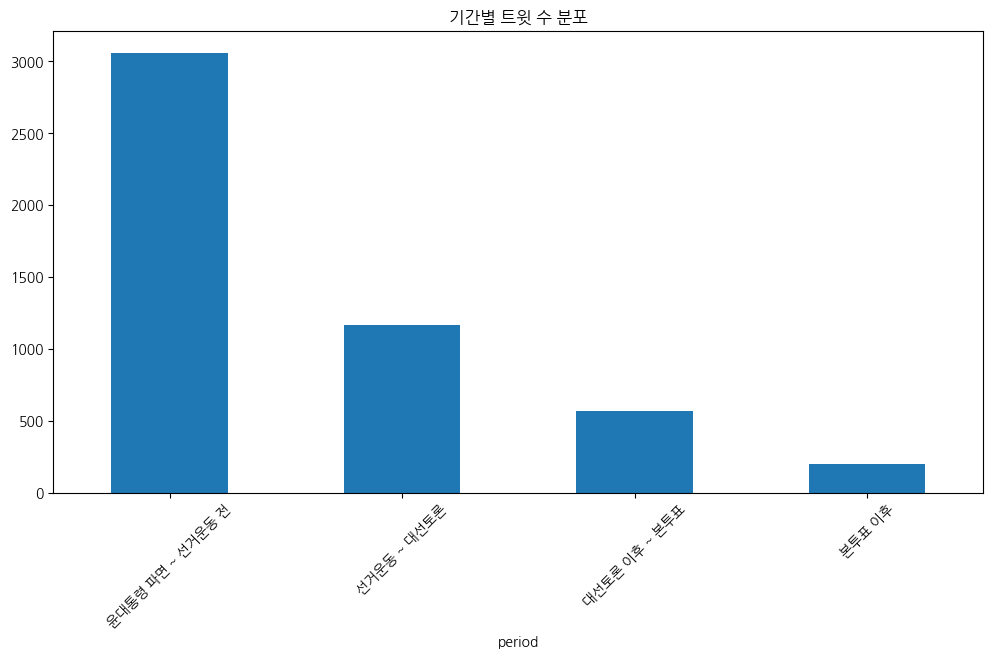

In [ ]:
# 기간별 트윗 수 분포
period_counts = df['period'].value_counts()
plt.figure(figsize=(12, 6))
period_counts.plot(kind='bar')
plt.title('기간별 트윗 수 분포')
plt.xticks(rotation=45)
plt.show()

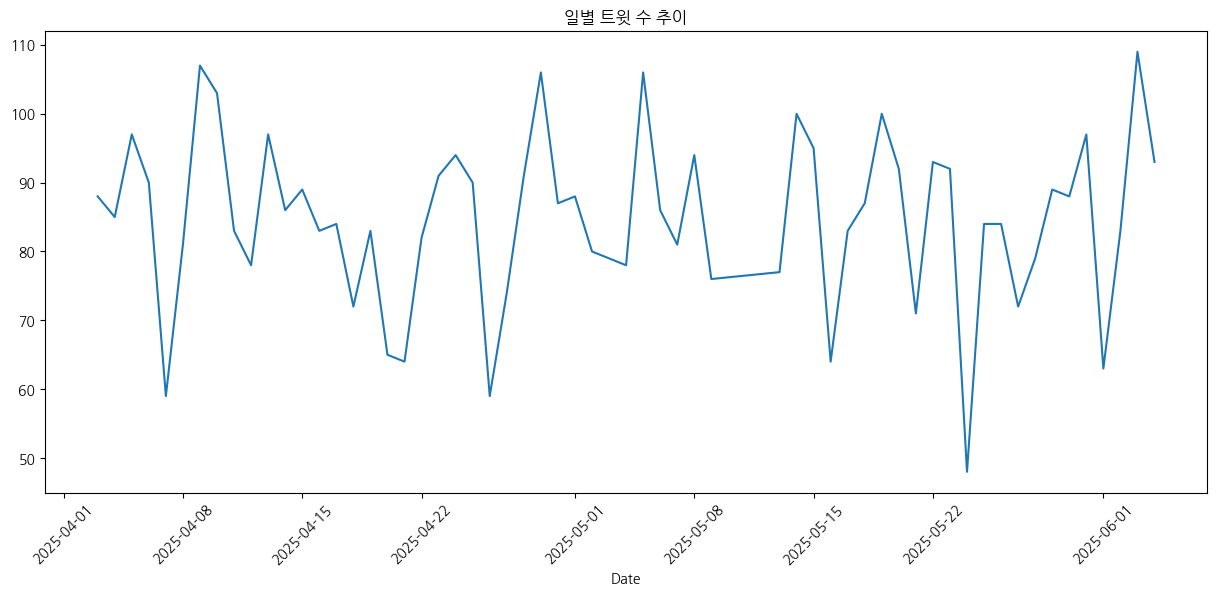

In [ ]:
# 일별 트윗 수 추이
df['Date'] = pd.to_datetime(df['Date'])
daily_tweets = df.groupby(df['Date'].dt.date).size()
plt.figure(figsize=(15, 6))
daily_tweets.plot()
plt.title('일별 트윗 수 추이')
plt.xticks(rotation=45)
plt.show()

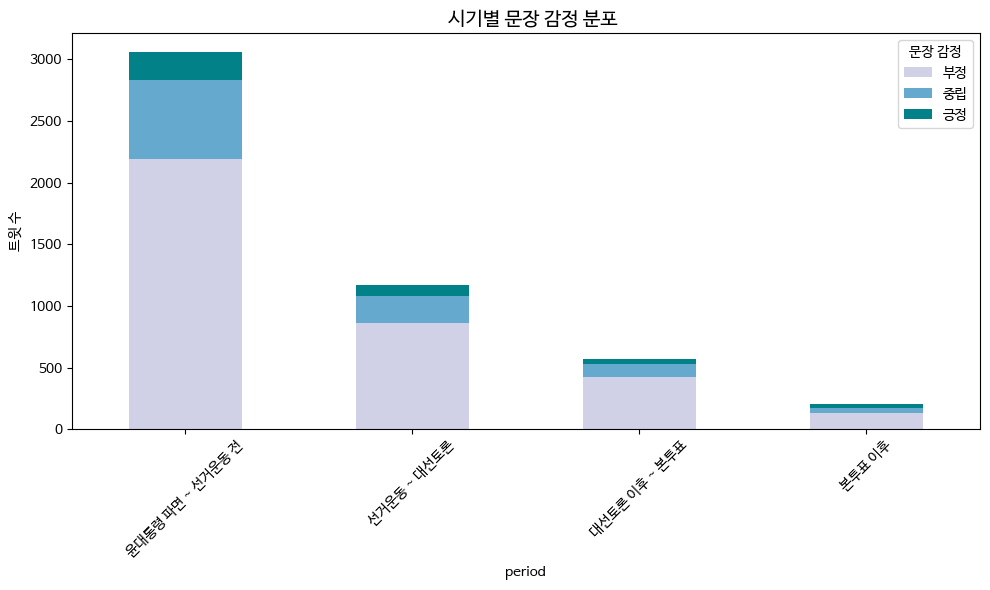

In [ ]:
# 감정 순서와 대응 컬러 (밝기 그라데이션)
sentiment_order = ['부정', '중립', '긍정']
color_map = sns.color_palette("PuBuGn", n_colors=3)

sent_period = df.groupby(['period', 'sentence_sentiment']).size().unstack(fill_value=0)
sent_period = sent_period.reindex(period_order)
sent_period = sent_period[sentiment_order]

# Plot
sent_period.plot(kind='bar', stacked=True, figsize=(10,6), color=color_map)
plt.title('🗓️ 시기별 문장 감정 분포', fontsize=14)

plt.ylabel('트윗 수')
plt.xticks(rotation=45)
plt.legend(title='문장 감정', loc='upper right')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, '타겟 감정 분포 (이재명 대상)')

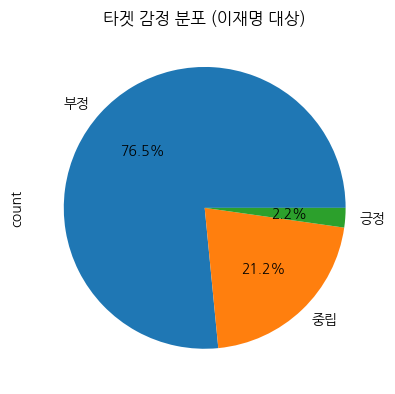

In [ ]:
# 타겟 감정 분포 (이재명에 대한 직접적 감정)
target_sentiment_dist = df['target_sentiment'].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
target_sentiment_dist.plot(kind='pie', autopct='%1.1f%%')
plt.title('타겟 감정 분포 (이재명 대상)')

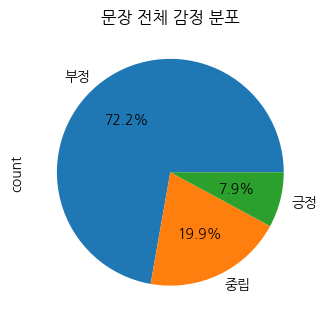

In [ ]:
# 문장 전체 감정 vs 타겟 감정 비교
plt.subplot(1, 2, 2)
sentence_sentiment_dist = df['sentence_sentiment'].value_counts()
sentence_sentiment_dist.plot(kind='pie', autopct='%1.1f%%')
plt.title('문장 전체 감정 분포')
plt.tight_layout()
plt.show()

## Distil-KOBERT

In [ ]:
# 구간별 지지율
# 파일 경로 설정
import pandas as pd
file_path = "/content/drive/MyDrive/Colab Notebooks/EDA/Final prediction/Distil_predicted.csv"

try:
    # CSV 파일 로드
    df = pd.read_csv(file_path)

    # 데이터 확인
    print("데이터 샘플:")
    print(df[['period', 'target_sentiment']].head(3))

    # 기간별 지지율 계산
    def calculate_support_rate(df):
        total = df.groupby('period').size()
        positive = df[df['target_sentiment']=='긍정'].groupby('period').size()
        return (positive / total).fillna(0).sort_values(ascending=False)

    support_rate = calculate_support_rate(df)

    # 결과 출력
    print("\n기간별 지지율:")
    print(support_rate.to_string())

except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 다음 사항을 확인하세요:")
    print("1. Google Drive 마운트 여부")
    print("2. 파일 경로 정확성: 현재 경로 -", file_path)
    print("3. CSV 파일 존재 여부")

데이터 샘플:
             period target_sentiment
0  윤대통령 파면 ~ 선거운동 전               중립
1  윤대통령 파면 ~ 선거운동 전               부정
2  윤대통령 파면 ~ 선거운동 전               부정

기간별 지지율:
period
대선토론 이후 ~ 본투표       0.027997
본투표 이후              0.026369
선거운동 ~ 대선토론         0.025919
윤대통령 파면 ~ 선거운동 전    0.024122


기간별 이재명 지지율 분석
4/3~4/6: 0.032 (3.2%) - 전체: 812, 긍정: 26
4/7~4/13: 0.025 (2.5%) - 전체: 1474, 긍정: 37
4/14~4/20: 0.018 (1.8%) - 전체: 1416, 긍정: 26
4/21~4/27: 0.026 (2.6%) - 전체: 1370, 긍정: 36
4/28~5/4: 0.031 (3.1%) - 전체: 1312, 긍정: 41
5/5~5/11: 0.013 (1.3%) - 전체: 1078, 긍정: 14
5/12~5/18: 0.026 (2.6%) - 전체: 1223, 긍정: 32
5/19~5/25: 0.025 (2.5%) - 전체: 1412, 긍정: 35
5/26~6/4: 0.028 (2.8%) - 전체: 2106, 긍정: 59

요약 결과:
       기간  전체_데이터  긍정_데이터  지지율
  4/3~4/6     812      26 3.20
 4/7~4/13    1474      37 2.51
4/14~4/20    1416      26 1.84
4/21~4/27    1370      36 2.63
 4/28~5/4    1312      41 3.12
 5/5~5/11    1078      14 1.30
5/12~5/18    1223      32 2.62
5/19~5/25    1412      35 2.48
 5/26~6/4    2106      59 2.80


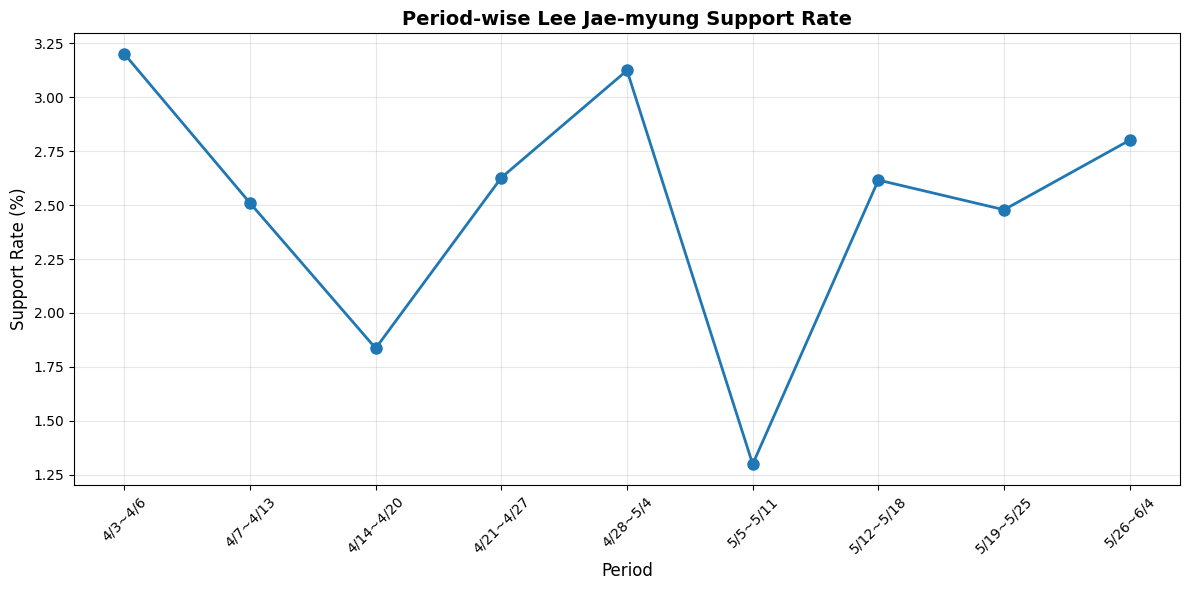

In [ ]:
# 주차별 DistilBert 지지율
import pandas as pd
from google.colab import drive


# CSV 파일 로드
file_path = "/content/drive/MyDrive/Colab Notebooks/EDA/Final prediction/Distil_predicted.csv"
df = pd.read_csv(file_path)

def calculate_support_rate_by_periods(df):
    """
    지정된 기간대별로 이재명 지지율을 계산하는 함수
    지지율 = target_sentiment가 '긍정'인 데이터 수 / 전체 데이터 수
    """

    # 날짜 컬럼을 datetime 형식으로 변환
    df['date'] = pd.to_datetime(df['Date'], errors='coerce')

    # 기간대별 범위 설정 (2025년 기준)
    date_ranges = [
        ('2025-04-03', '2025-04-06', '4/3~4/6'),
        ('2025-04-07', '2025-04-13', '4/7~4/13'),
        ('2025-04-14', '2025-04-20', '4/14~4/20'),
        ('2025-04-21', '2025-04-27', '4/21~4/27'),
        ('2025-04-28', '2025-05-04', '4/28~5/4'),
        ('2025-05-05', '2025-05-11', '5/5~5/11'),
        ('2025-05-12', '2025-05-18', '5/12~5/18'),
        ('2025-05-19', '2025-05-25', '5/19~5/25'),
        ('2025-05-26', '2025-06-04', '5/26~6/4')
    ]

    support_rates = {}
    detailed_results = []

    print("기간별 이재명 지지율 분석")
    print("=" * 50)

    for start_date, end_date, period_name in date_ranges:
        # 해당 기간의 데이터 필터링
        mask = (df['date'] >= start_date) & (df['date'] <= end_date)
        period_data = df.loc[mask]

        # 전체 데이터 수
        total_count = len(period_data)

        # 긍정 sentiment 데이터 수
        positive_count = len(period_data[period_data['target_sentiment'] == '긍정'])

        # 지지율 계산
        support_rate = positive_count / total_count if total_count > 0 else 0

        # 결과 저장
        support_rates[period_name] = support_rate
        detailed_results.append({
            '기간': period_name,
            '전체_데이터': total_count,
            '긍정_데이터': positive_count,
            '지지율': round(support_rate * 100, 2)
        })

        # 결과 출력
        print(f"{period_name}: {support_rate:.3f} ({support_rate*100:.1f}%) - 전체: {total_count}, 긍정: {positive_count}")

    return support_rates, pd.DataFrame(detailed_results)

# 함수 실행
try:
    support_rates, results_df = calculate_support_rate_by_periods(df)

    print("\n" + "=" * 50)
    print("요약 결과:")
    print(results_df.to_string(index=False))

    # 시각화 (선택사항)
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm

    # 한글 폰트 설정
    plt.rcParams['font.family'] = 'DejaVu Sans'

    # 그래프 생성
    periods = list(support_rates.keys())
    rates = [rate * 100 for rate in support_rates.values()]

    plt.figure(figsize=(12, 6))
    plt.plot(periods, rates, marker='o', linewidth=2, markersize=8)
    plt.title('Period-wise Lee Jae-myung Support Rate', fontsize=14, fontweight='bold')
    plt.xlabel('Period', fontsize=12)
    plt.ylabel('Support Rate (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"오류 발생: {e}")
    print("다음 사항을 확인해주세요:")
    print("1. CSV 파일의 컬럼명 확인 (Date, target_sentiment)")
    print("2. 파일 경로 정확성")
    print("3. 데이터 형식 일치 여부")


In [ ]:
# 파일 불러오기
file_path = "/content/drive/MyDrive/Data/KoBERT/X_crawling_predicted.xlsx"
df = pd.read_excel(file_path)
df['Date'] = pd.to_datetime(df['Date'])

# 영어 감정 레이블 매핑
label_map = {'긍정': 'Positive', '중립': 'Neutral', '부정': 'Negative', 'N/A': 'N/A'}
df['sentence_sentiment'] = df['sentence_sentiment'].map(label_map)
df['target_sentiment'] = df['target_sentiment'].map(label_map)

# target_sentiment에서 N/A 제외
target_df = df[df['target_sentiment'] != 'N/A']

# 날짜별 감정 비율 계산 함수
def get_sentiment_ratio(data, column):
    ratio = (
        data.groupby(['Date', column])
        .size()
        .unstack(fill_value=0)
    )
    return ratio.div(ratio.sum(axis=1), axis=0)

# 비율 계산
sentence_ratio = get_sentiment_ratio(df, 'sentence_sentiment')
target_ratio = get_sentiment_ratio(target_df, 'target_sentiment')


In [ ]:
# 1. 이동 평균 기반 추세 분석 (7일 이동 평균)
def plot_moving_average(ratio_df, title):
    ma_df = ratio_df.rolling(window=7, min_periods=1).mean()
    ma_df.plot(figsize=(10, 5), title=f"{title} Sentiment (7-Day Moving Average)", marker='o')
    plt.ylabel("Sentiment Ratio")
    plt.xlabel("Date")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 2. 일별 감정 변화량 분석
def plot_daily_change(ratio_df, title):
    delta = ratio_df.diff()
    delta.plot(figsize=(10, 5), title=f"{title} Sentiment Daily Change", marker='x')
    plt.ylabel("Change in Ratio")
    plt.xlabel("Date")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 2-1. 일별 감정 변화량 분석(감정 별)
def plot_sentiment_change_separate(ratio_df, title_prefix=""):
    delta = ratio_df.diff()
    sentiments = delta.columns.tolist()

    # 색상 지정
    colors = {
        '부정': 'blue',
        '중립': 'orange',
        '긍정': 'green'
    }

    # y축 범위 통일
    y_min = delta.min().min() * 1.1
    y_max = delta.max().max() * 1.1

    fig, axes = plt.subplots(nrows=len(sentiments), ncols=1, figsize=(12, 4 * len(sentiments)), sharex=True)

    for i, sentiment in enumerate(sentiments):
        ax = axes[i]
        ax.plot(delta.index, delta[sentiment], marker='o', color=colors.get(sentiment, 'gray'))
        ax.set_title(f"{title_prefix} - {sentiment} 변화량", fontsize=13)
        ax.set_ylabel("Change")
        ax.set_ylim(y_min, y_max)
        ax.grid(True)

        # 날짜 포맷 YYYY-MM-DD
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    axes[-1].set_xlabel("Date")
    fig.autofmt_xdate(rotation=45)
    plt.tight_layout()
    plt.show()

# 3. 감정 변화의 모멘텀 (연속 diff)
def plot_momentum(ratio_df, title):
    momentum = ratio_df.diff().diff()
    momentum.plot(figsize=(10, 5), title=f"{title} Sentiment Momentum", linestyle='--')
    plt.ylabel("Momentum")
    plt.xlabel("Date")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 5. period별 감정 분포 (bar plot)
def plot_period_distribution(data, column, title):
    period_ratio = (
        data.groupby(['period', column])
        .size()
        .unstack(fill_value=0)
    )
    period_ratio = period_ratio.div(period_ratio.sum(axis=1), axis=0)
    period_ratio.plot(kind='bar', stacked=True, figsize=(10, 5), title=f"{title} Sentiment by Period")
    plt.ylabel("Ratio")
    plt.xlabel("Period")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 6. 감정 히트맵 (날짜 x 감정)


def plot_sentiment_heatmap(ratio_df, title):
    # 컬럼명 날짜 포맷 간단히 변경 (YYYY-MM-DD-HH)
    new_columns = [pd.to_datetime(str(col)).strftime('%Y-%m-%d-%H') for col in ratio_df.index]
    ratio_df_formatted = ratio_df.copy()
    ratio_df_formatted.index = new_columns

    plt.figure(figsize=(10, 6))
    sns.heatmap(ratio_df_formatted.T, cmap="YlGnBu", annot=False)  # ✅ annot 제거
    plt.title(f"{title} Sentiment Heatmap")
    plt.xlabel("Date")
    plt.ylabel("Sentiment")
    plt.tight_layout()
    plt.show()

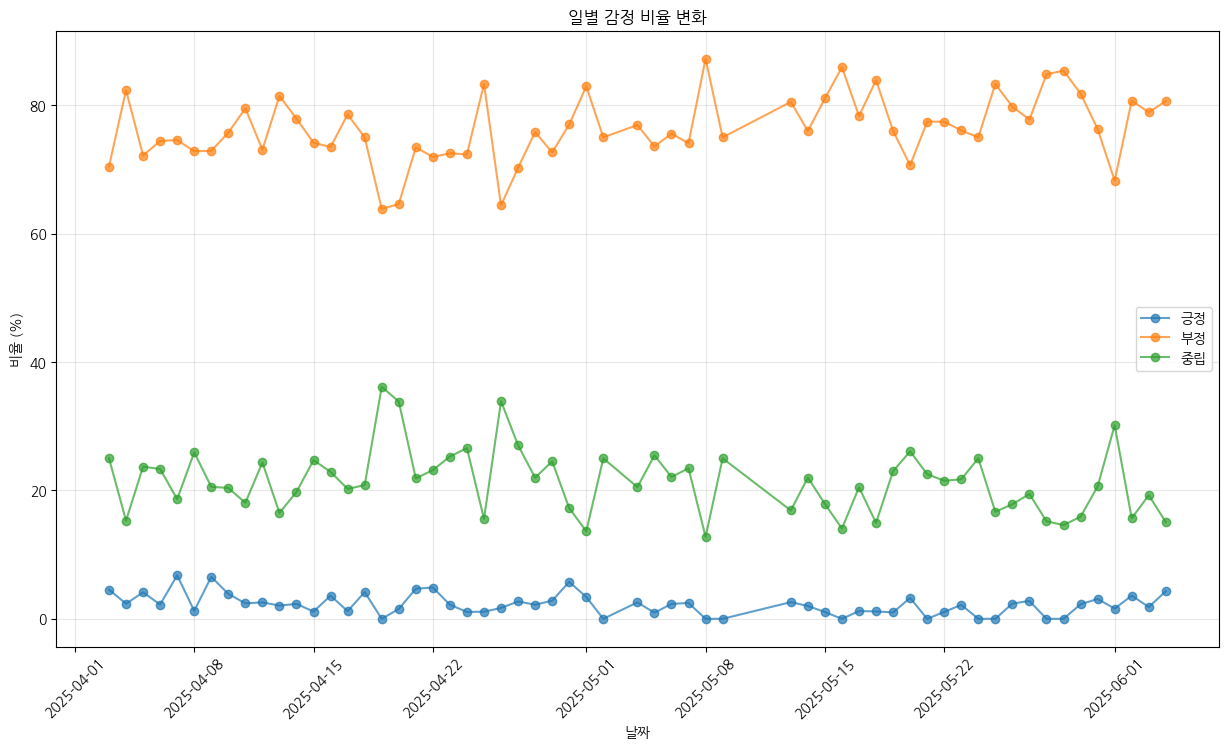

In [ ]:
# 일별 감정 비율 변화
daily_sentiment = df.groupby([df['Date'].dt.date, 'target_sentiment']).size().unstack(fill_value=0)
daily_sentiment_pct = daily_sentiment.div(daily_sentiment.sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 8))
for sentiment in daily_sentiment_pct.columns:
    plt.plot(daily_sentiment_pct.index, daily_sentiment_pct[sentiment],
             label=sentiment, marker='o', alpha=0.7)

plt.title('일별 감정 비율 변화')
plt.xlabel('날짜')
plt.ylabel('비율 (%)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

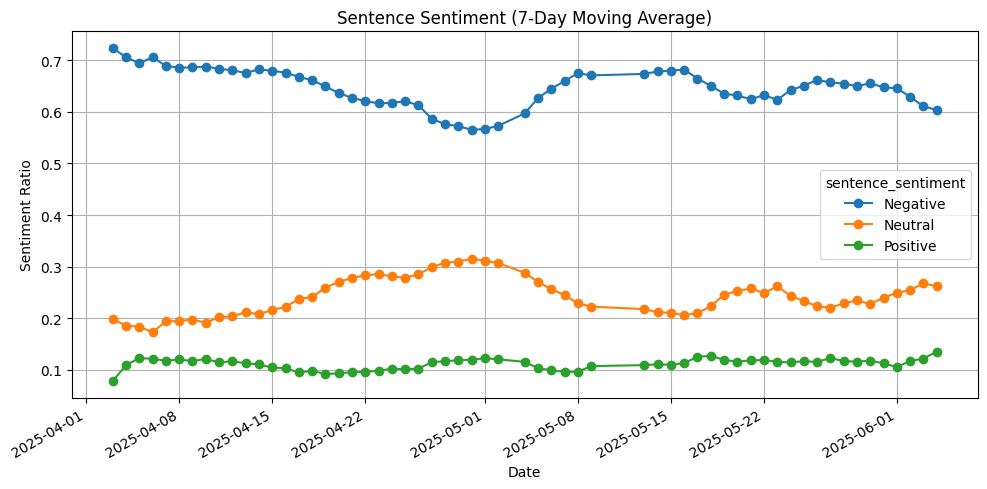

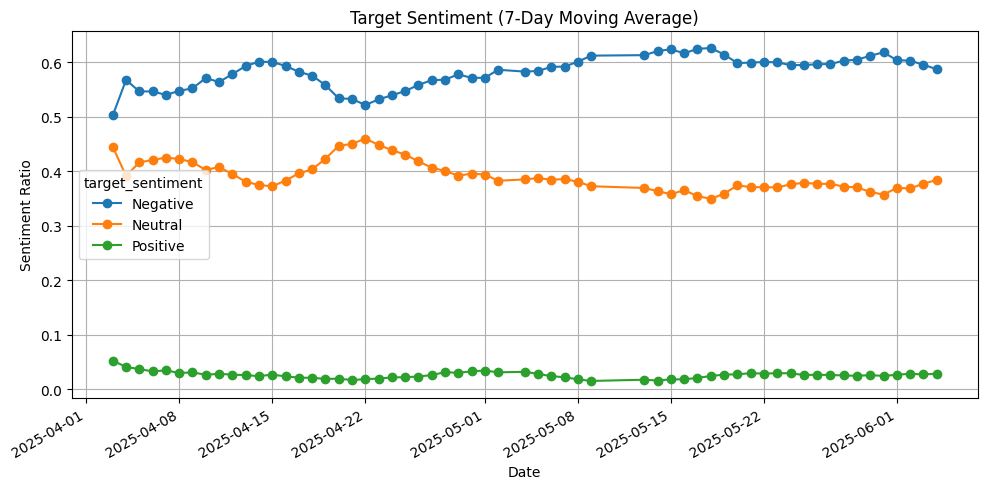

In [ ]:
# 이동 평균 기반 추세 분석(7일)
plot_moving_average(sentence_ratio, "Sentence")
plot_moving_average(target_ratio, "Target")

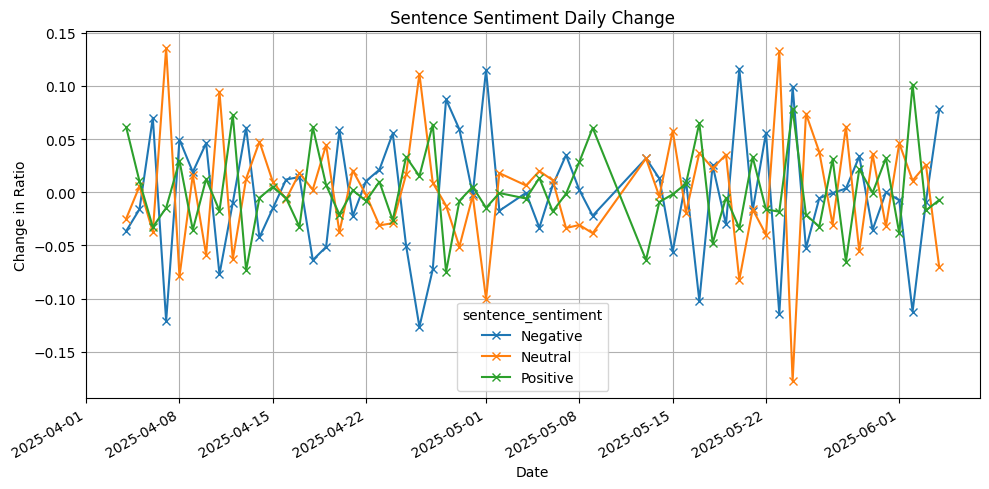

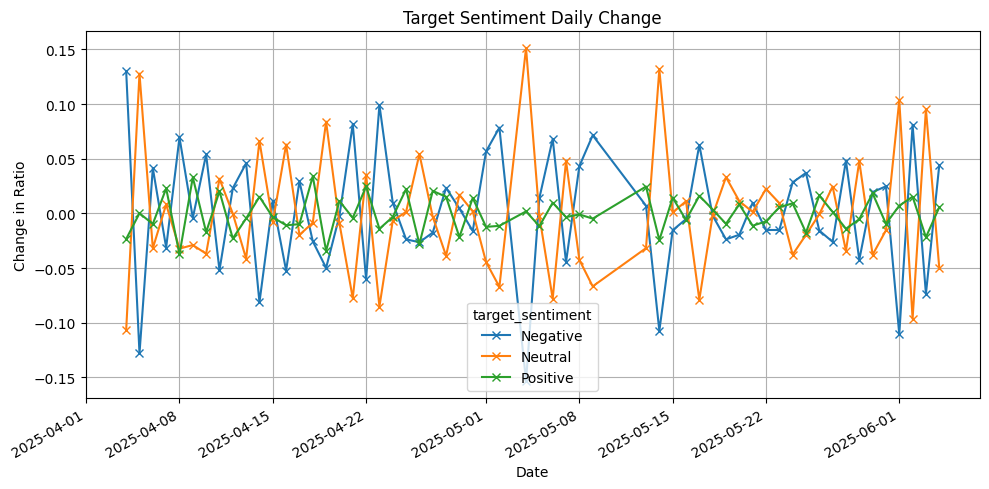

In [ ]:
# 일별 감정 변화량 분석
plot_daily_change(sentence_ratio, "Sentence")
plot_daily_change(target_ratio, "Target")

<ipython-input-13-3577652696>:53: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()


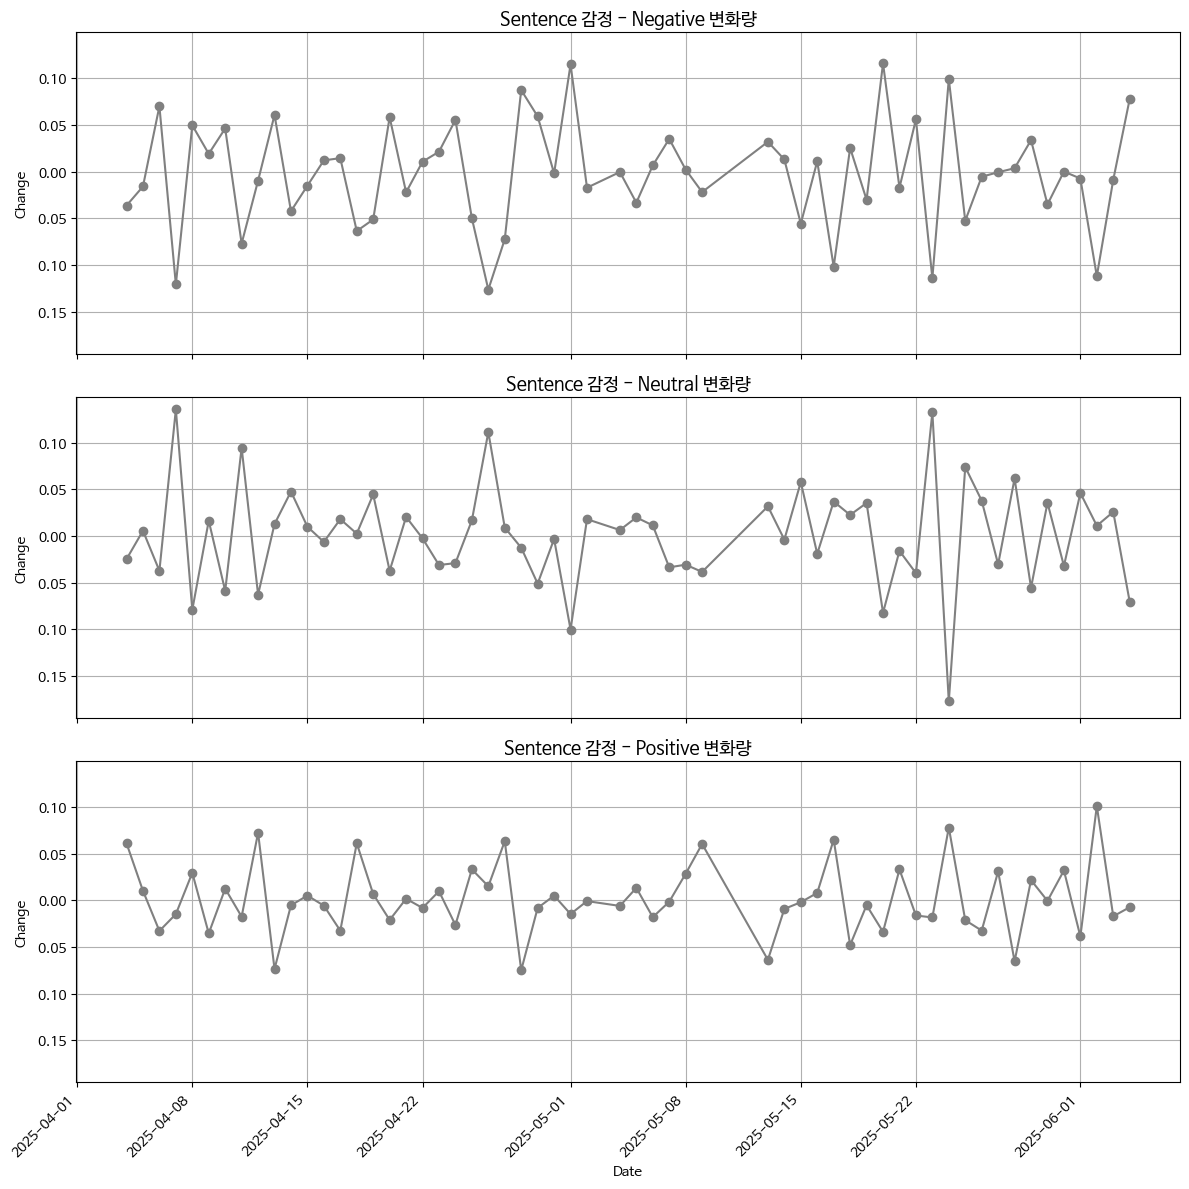

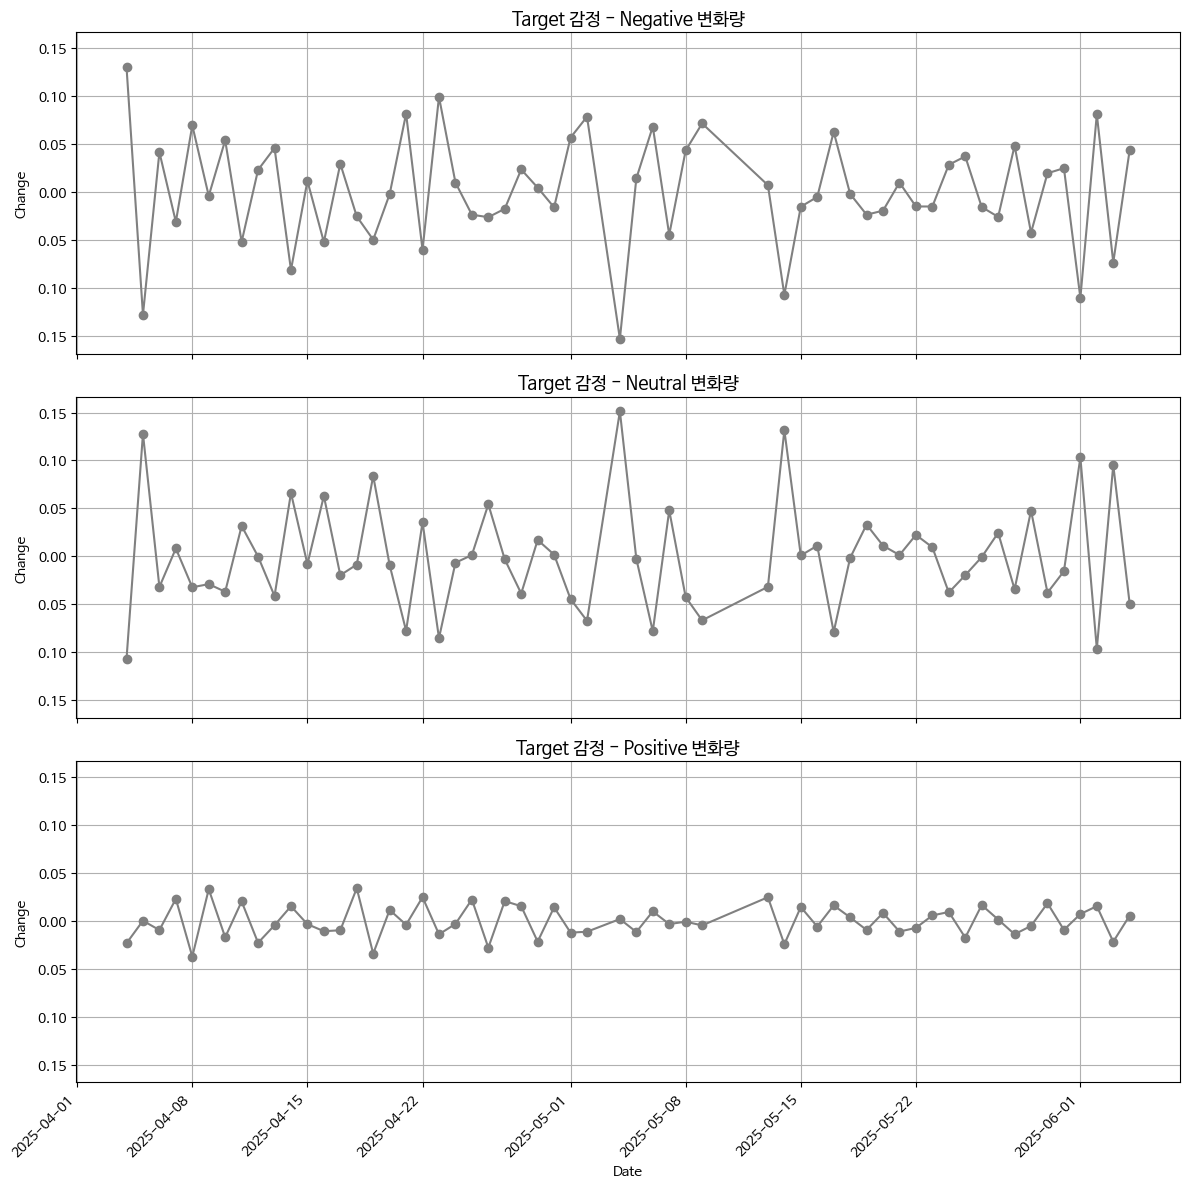

In [ ]:
# 일별 감정 변화량 분석 (감정 별)
# sentence 감정 변화량
plot_sentiment_change_separate(sentence_ratio, title_prefix="Sentence 감정")

# target 감정 변화량
plot_sentiment_change_separate(target_ratio, title_prefix="Target 감정")

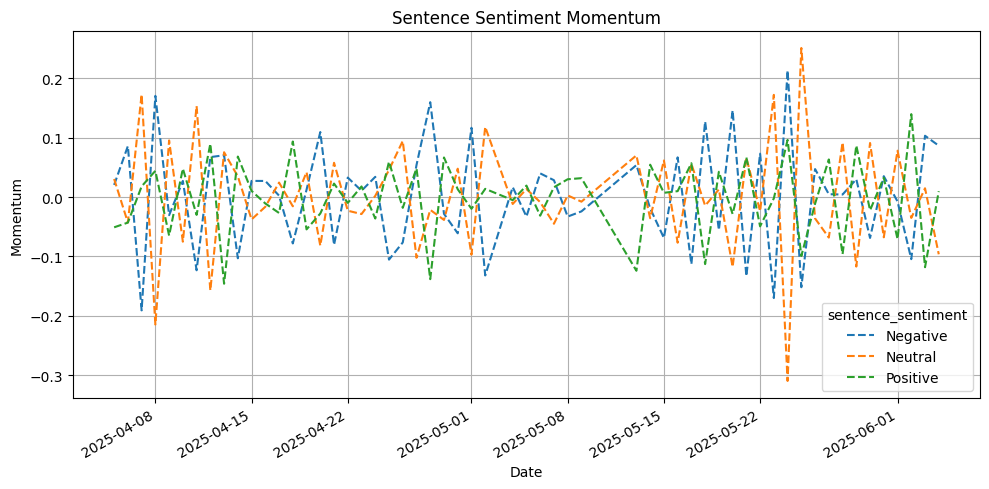

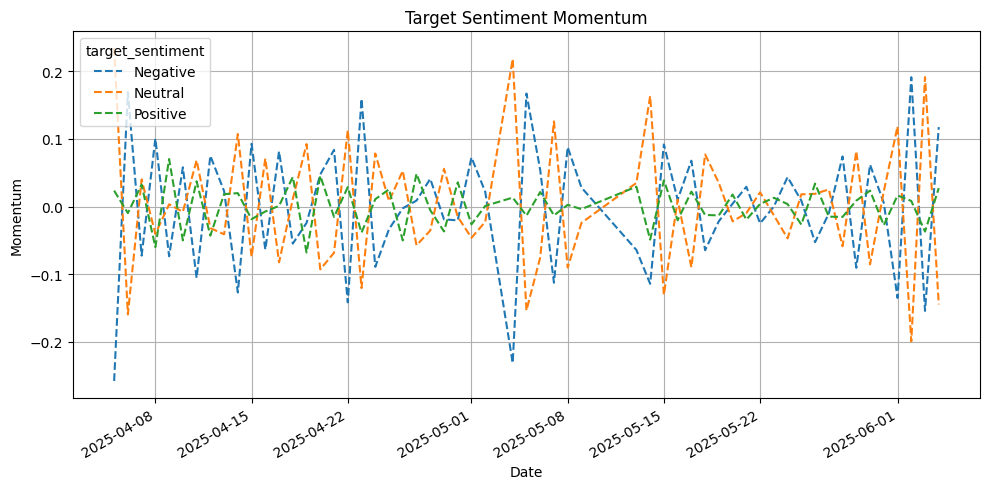

In [ ]:
# 감정 변화 모멘텀(2차 미분)
plot_momentum(sentence_ratio, "Sentence")
plot_momentum(target_ratio, "Target")

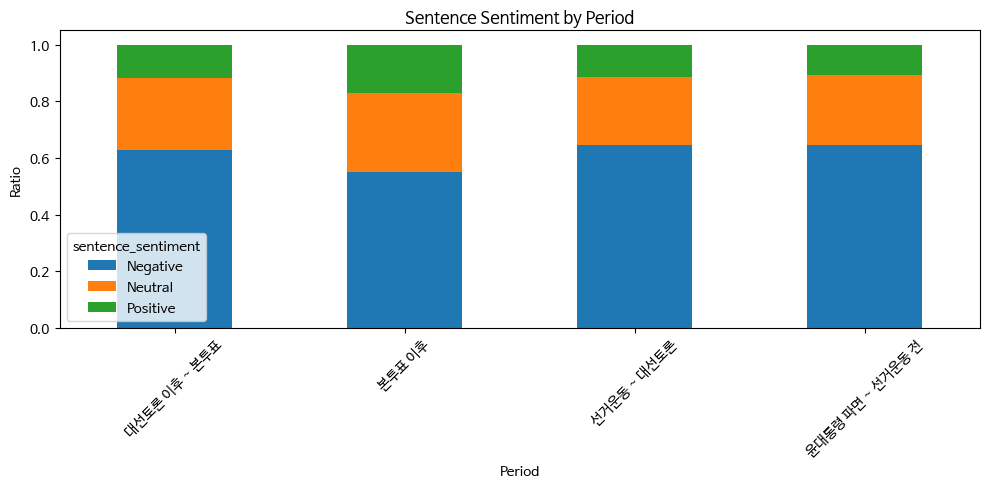

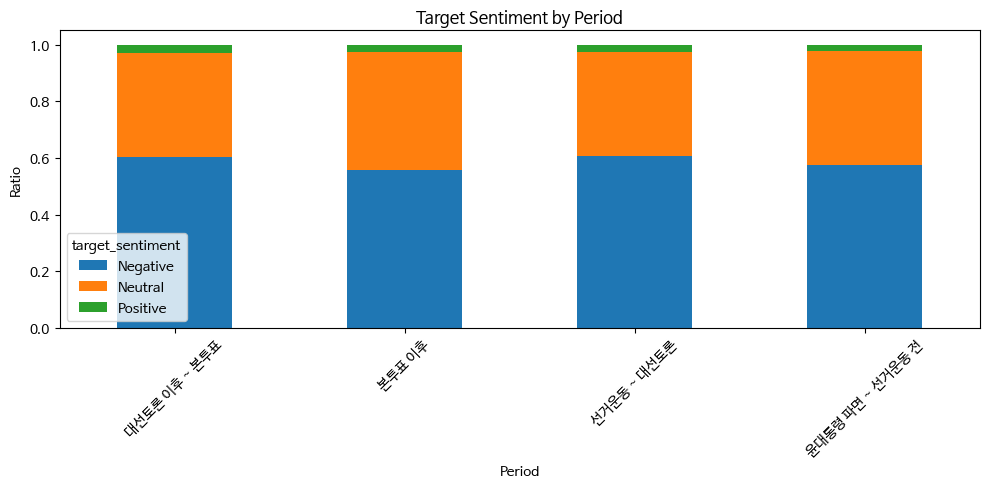

In [ ]:
# period 감정 분포
plot_period_distribution(df, 'sentence_sentiment', "Sentence")
plot_period_distribution(target_df, 'target_sentiment', "Target")

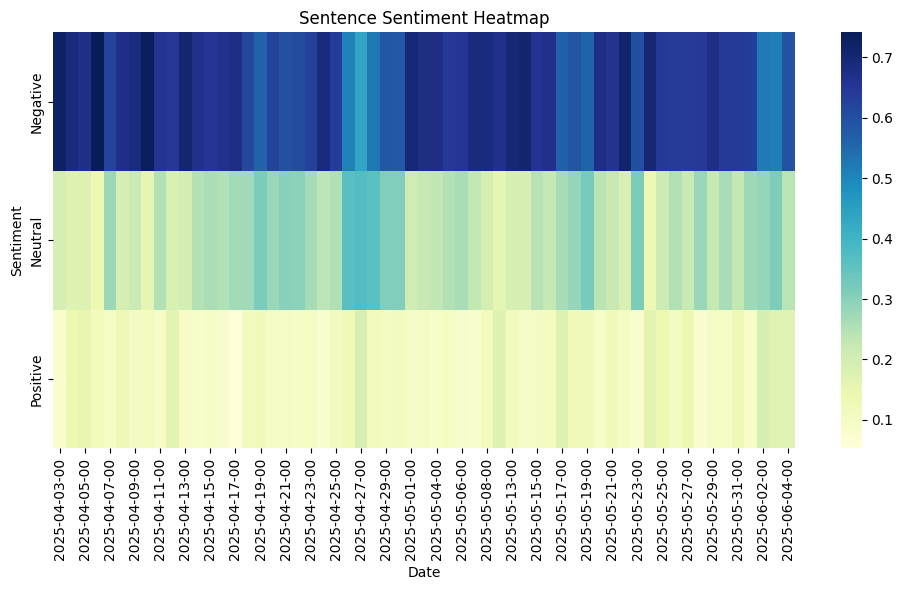

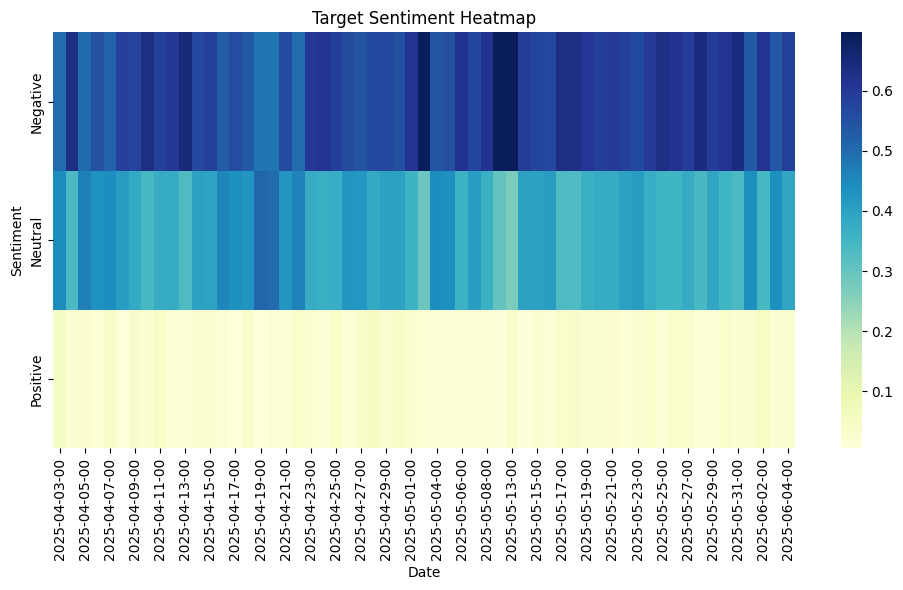

In [ ]:
# 감정 히트맵
plot_sentiment_heatmap(sentence_ratio, "Sentence")
plot_sentiment_heatmap(target_ratio, "Target")

## VADER

In [ ]:
# 파일 경로 설정
import pandas as pd
file_path = "/content/drive/MyDrive/Colab Notebooks/EDA/Final prediction/Vader_predicted"

try:
    # CSV 파일 로드
    df = pd.read_csv(file_path)

    # 데이터 확인
    print("데이터 샘플:")
    print(df[['period', 'sentiment_label']].head(3))

    # 기간별 지지율 계산
    def calculate_support_rate(df):
        total = df.groupby('period').size()
        positive = df[df['sentiment_label']=='positive'].groupby('period').size()
        return (positive / total).fillna(0).sort_values(ascending=False)

    support_rate = calculate_support_rate(df)

    # 결과 출력
    print("\n기간별 지지율:")
    print(support_rate.to_string())

except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 다음 사항을 확인하세요:")
    print("1. Google Drive 마운트 여부")
    print("2. 파일 경로 정확성: 현재 경로 -", file_path)
    print("3. CSV 파일 존재 여부")

데이터 샘플:
             period sentiment_label
0  윤대통령 파면 ~ 선거운동 전        negative
1  윤대통령 파면 ~ 선거운동 전        negative
2  윤대통령 파면 ~ 선거운동 전        positive

기간별 지지율:
period
본투표 이후              0.406021
윤대통령 파면 ~ 선거운동 전    0.399769
선거운동 ~ 대선토론         0.396658
대선토론 이후 ~ 본투표       0.369874


기간별 이재명 지지율 분석
4/3~4/6: 0.378 (37.8%) - 전체: 3318, 긍정: 1254
4/7~4/13: 0.378 (37.8%) - 전체: 3996, 긍정: 1509
4/14~4/20: 0.400 (40.0%) - 전체: 3824, 긍정: 1530
4/21~4/27: 0.413 (41.3%) - 전체: 3755, 긍정: 1549
4/28~5/4: 0.433 (43.3%) - 전체: 3867, 긍정: 1676
5/5~5/11: 0.395 (39.5%) - 전체: 3738, 긍정: 1476
5/12~5/18: 0.412 (41.2%) - 전체: 3823, 긍정: 1576
5/19~5/25: 0.381 (38.1%) - 전체: 3755, 긍정: 1431
5/26~6/4: 0.381 (38.1%) - 전체: 5447, 긍정: 2073

요약 결과:
       기간  전체_데이터  긍정_데이터   지지율
  4/3~4/6    3318    1254 37.79
 4/7~4/13    3996    1509 37.76
4/14~4/20    3824    1530 40.01
4/21~4/27    3755    1549 41.25
 4/28~5/4    3867    1676 43.34
 5/5~5/11    3738    1476 39.49
5/12~5/18    3823    1576 41.22
5/19~5/25    3755    1431 38.11
 5/26~6/4    5447    2073 38.06


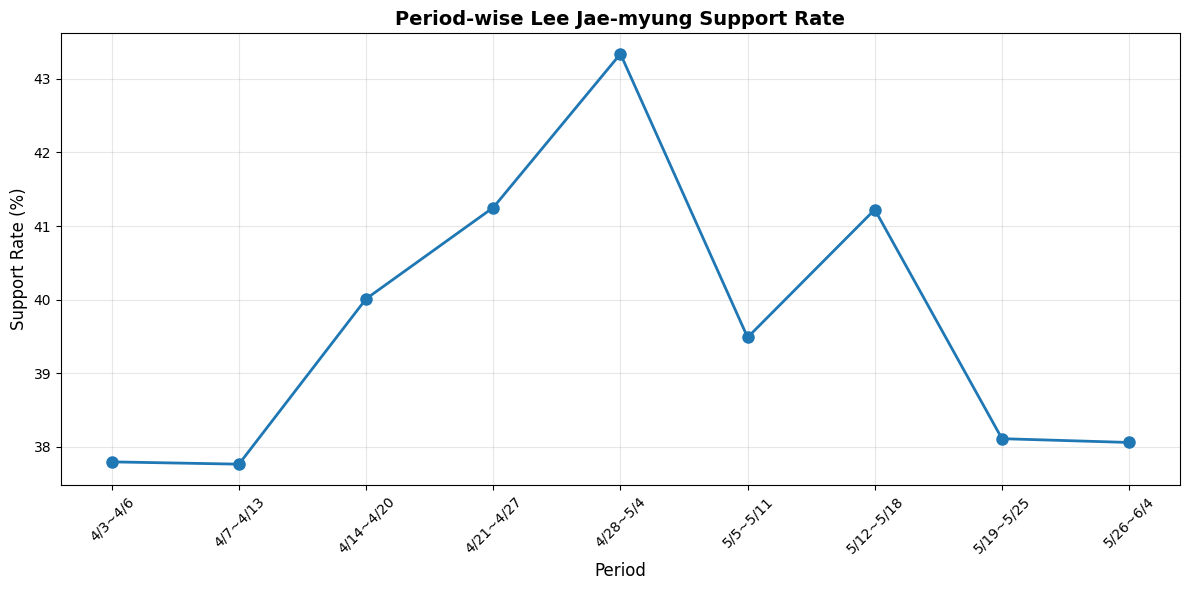

In [ ]:
# 주차별 VADER 지지율
import pandas as pd
from google.colab import drive


# CSV 파일 로드
file_path = "/content/drive/MyDrive/Colab Notebooks/EDA/Final prediction/Vader_predicted"
df = pd.read_csv(file_path)

def calculate_support_rate_by_periods(df):
    """
    지정된 기간대별로 이재명 지지율을 계산하는 함수
    지지율 = target_sentiment가 '긍정'인 데이터 수 / 전체 데이터 수
    """

    # 날짜 컬럼을 datetime 형식으로 변환
    df['date'] = pd.to_datetime(df['Date'], errors='coerce')

    # 기간대별 범위 설정 (2025년 기준)
    date_ranges = [
        ('2025-04-03', '2025-04-06', '4/3~4/6'),
        ('2025-04-07', '2025-04-13', '4/7~4/13'),
        ('2025-04-14', '2025-04-20', '4/14~4/20'),
        ('2025-04-21', '2025-04-27', '4/21~4/27'),
        ('2025-04-28', '2025-05-04', '4/28~5/4'),
        ('2025-05-05', '2025-05-11', '5/5~5/11'),
        ('2025-05-12', '2025-05-18', '5/12~5/18'),
        ('2025-05-19', '2025-05-25', '5/19~5/25'),
        ('2025-05-26', '2025-06-04', '5/26~6/4')
    ]

    support_rates = {}
    detailed_results = []

    print("기간별 이재명 지지율 분석")
    print("=" * 50)

    for start_date, end_date, period_name in date_ranges:
        # 해당 기간의 데이터 필터링
        mask = (df['date'] >= start_date) & (df['date'] <= end_date)
        period_data = df.loc[mask]

        # 전체 데이터 수
        total_count = len(period_data)

        # 긍정 sentiment 데이터 수
        positive_count = len(period_data[period_data['sentiment_label'] == 'positive'])

        # 지지율 계산
        support_rate = positive_count / total_count if total_count > 0 else 0

        # 결과 저장
        support_rates[period_name] = support_rate
        detailed_results.append({
            '기간': period_name,
            '전체_데이터': total_count,
            '긍정_데이터': positive_count,
            '지지율': round(support_rate * 100, 2)
        })

        # 결과 출력
        print(f"{period_name}: {support_rate:.3f} ({support_rate*100:.1f}%) - 전체: {total_count}, 긍정: {positive_count}")

    return support_rates, pd.DataFrame(detailed_results)

# 함수 실행
try:
    support_rates, results_df = calculate_support_rate_by_periods(df)

    print("\n" + "=" * 50)
    print("요약 결과:")
    print(results_df.to_string(index=False))

    # 시각화 (선택사항)
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm

    # 한글 폰트 설정
    plt.rcParams['font.family'] = 'DejaVu Sans'

    # 그래프 생성
    periods = list(support_rates.keys())
    rates = [rate * 100 for rate in support_rates.values()]

    plt.figure(figsize=(12, 6))
    plt.plot(periods, rates, marker='o', linewidth=2, markersize=8)
    plt.title('Period-wise Lee Jae-myung Support Rate', fontsize=14, fontweight='bold')
    plt.xlabel('Period', fontsize=12)
    plt.ylabel('Support Rate (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"오류 발생: {e}")
    print("다음 사항을 확인해주세요:")
    print("1. CSV 파일의 컬럼명 확인 (Date, target_sentiment)")
    print("2. 파일 경로 정확성")
    print("3. 데이터 형식 일치 여부")


## 여론조사 결과

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 8)

# 데이터 생성
data = {
    '주차': ['4월 1주차', '4월 2주차', '4월 3주차', '4월 4주차', '5월 1주차',
             '5월 2주차', '5월 3주차', '5월 4주차', '6월 1주차'],
    '날짜범위': ['4/3~4/6', '4/7~4/13', '4/14~4/20', '4/21~4/27', '4/28~5/4',
                '5/5~5/11', '5/12~5/18', '5/19~5/25', '5/26~6/4'],
    '기간대': ['파면~선거운동 전', '파면~선거운동 전', '파면~선거운동 전', '파면~선거운동 전',
              '파면~선거운동 전', '선거운동~대선토론', '선거운동~대선토론', '대선토론 이후~본투표', '본투표~'],
    '한국갤럽': [0.34, 0.37, 0.38, 0.38, 0.46, 0.51, 0.45, 0.46, 0.49],
    '리얼미터': [0.34, 0.48, 0.5, 0.48, 0.46, 0.51, 0.5, 0.48, 0.58],
    'VADER': [0.378, 0.378, 0.4, 0.413, 0.395, 0.412, 0.381, 0.381, 0.381],
    'DistilBert': [0.032, 0.025, 0.018, 0.026, 0.031, 0.013, 0.036, 0.025, 0.028],
    'KoBert': [0.031, 0.037, 0.027, 0.019, 0.021, 0.016, 0.02, 0.017, 0.023]
}

df = pd.DataFrame(data)
print("=== 데이터 기본 정보 ===")
print(df.info())
print("\n=== 기본 통계량 ===")
print(df.describe())


=== 데이터 기본 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   주차          9 non-null      object 
 1   날짜범위        9 non-null      object 
 2   기간대         9 non-null      object 
 3   한국갤럽        9 non-null      float64
 4   리얼미터        9 non-null      float64
 5   VADER       9 non-null      float64
 6   DistilBert  9 non-null      float64
 7   KoBert      9 non-null      float64
dtypes: float64(5), object(3)
memory usage: 708.0+ bytes
None

=== 기본 통계량 ===
           한국갤럽      리얼미터     VADER  DistilBert    KoBert
count  9.000000  9.000000  9.000000    9.000000  9.000000
mean   0.426667  0.481111  0.391000    0.026000  0.023444
std    0.060000  0.062937  0.014405    0.007071  0.006966
min    0.340000  0.340000  0.378000    0.013000  0.016000
25%    0.380000  0.480000  0.381000    0.025000  0.019000
50%    0.450000  0.480000  0.381000    0.02600

In [ ]:
# 기간대별 평균 지지율 분석
period_analysis = df.groupby('기간대')[['한국갤럽', '리얼미터', 'VADER', 'DistilBert', 'KoBert']].agg(['mean', 'std', 'count'])

print("\n=== 기간대별 평균 지지율 ===")
for period in df['기간대'].unique():
    period_data = df[df['기간대'] == period]
    print(f"\n{period}:")
    print(f"  한국갤럽: {period_data['한국갤럽'].mean():.3f} ± {period_data['한국갤럽'].std():.3f}")
    print(f"  리얼미터: {period_data['리얼미터'].mean():.3f} ± {period_data['리얼미터'].std():.3f}")
    print(f"  VADER: {period_data['VADER'].mean():.3f} ± {period_data['VADER'].std():.3f}")
    print(f"  DistilBert: {period_data['DistilBert'].mean():.3f} ± {period_data['DistilBert'].std():.3f}")
    print(f"  KoBert: {period_data['KoBert'].mean():.3f} ± {period_data['KoBert'].std():.3f}")



=== 기간대별 평균 지지율 ===

파면~선거운동 전:
  한국갤럽: 0.386 ± 0.044
  리얼미터: 0.452 ± 0.064
  VADER: 0.393 ± 0.015
  DistilBert: 0.026 ± 0.006
  KoBert: 0.027 ± 0.007

선거운동~대선토론:
  한국갤럽: 0.480 ± 0.042
  리얼미터: 0.505 ± 0.007
  VADER: 0.396 ± 0.022
  DistilBert: 0.024 ± 0.016
  KoBert: 0.018 ± 0.003

대선토론 이후~본투표:
  한국갤럽: 0.460 ± nan
  리얼미터: 0.480 ± nan
  VADER: 0.381 ± nan
  DistilBert: 0.025 ± nan
  KoBert: 0.017 ± nan

본투표~:
  한국갤럽: 0.490 ± nan
  리얼미터: 0.580 ± nan
  VADER: 0.381 ± nan
  DistilBert: 0.028 ± nan
  KoBert: 0.023 ± nan


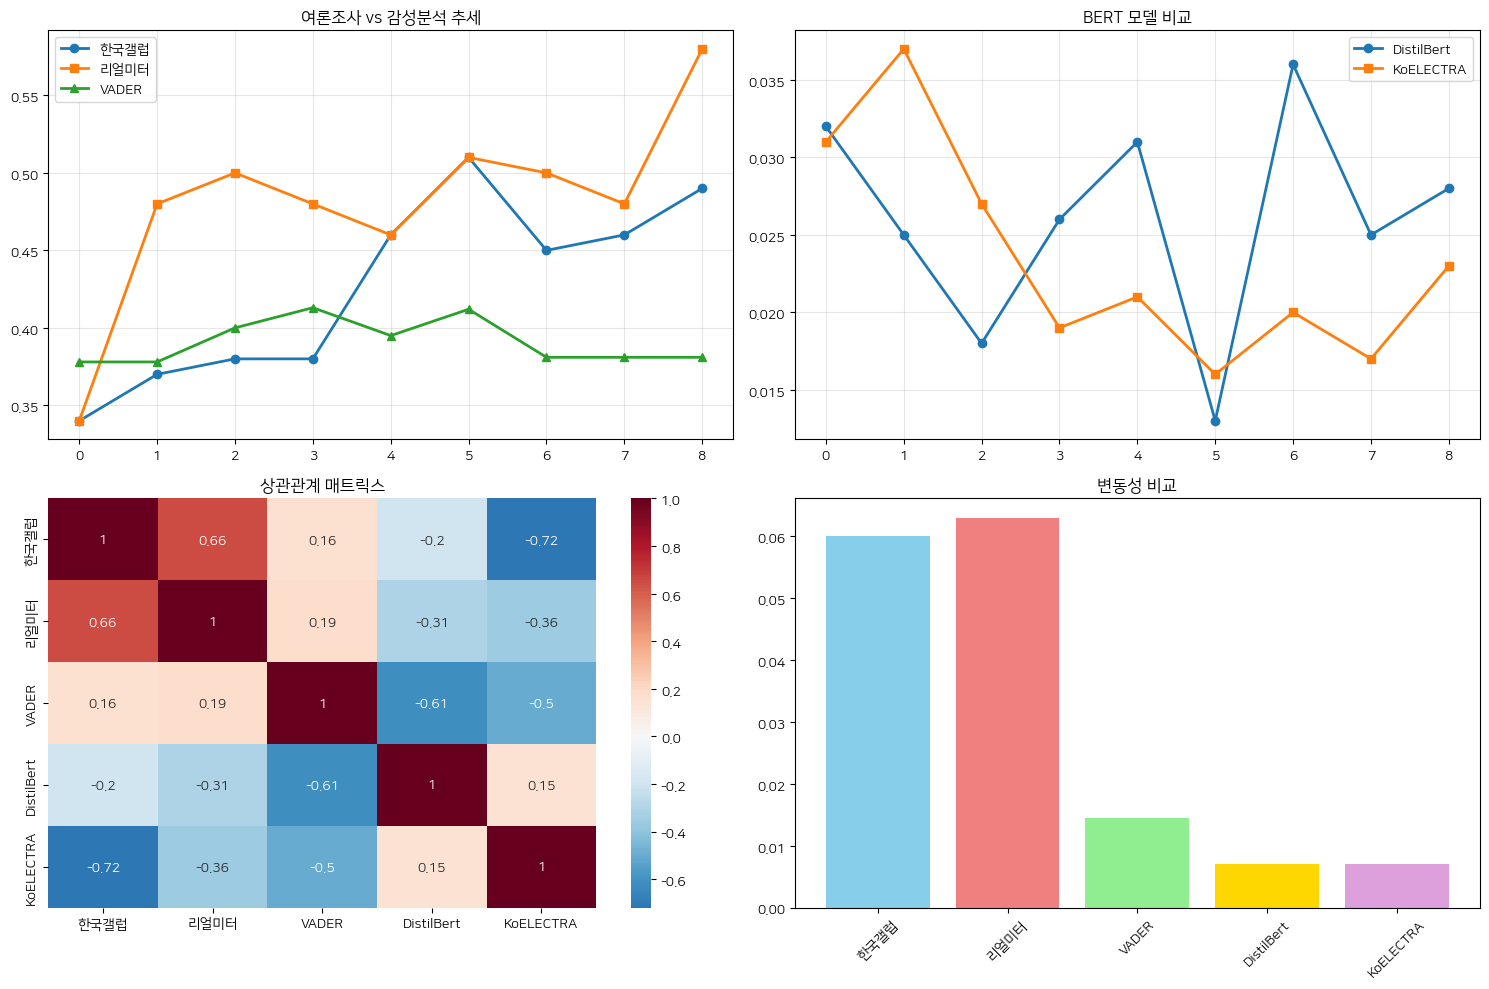

그래프 생성 완료!


In [ ]:
# 데이터 및 그래프 생성
import pandas as pd
import numpy as np

data = {
    '주차': ['4월 1주차', '4월 2주차', '4월 3주차', '4월 4주차', '5월 1주차',
             '5월 2주차', '5월 3주차', '5월 4주차', '6월 1주차'],
    '기간대': ['파면~선거운동 전', '파면~선거운동 전', '파면~선거운동 전', '파면~선거운동 전',
              '파면~선거운동 전', '선거운동~대선토론', '선거운동~대선토론', '대선토론 이후~본투표', '본투표~'],
    '한국갤럽': [0.34, 0.37, 0.38, 0.38, 0.46, 0.51, 0.45, 0.46, 0.49],
    '리얼미터': [0.34, 0.48, 0.5, 0.48, 0.46, 0.51, 0.5, 0.48, 0.58],
    'VADER': [0.378, 0.378, 0.4, 0.413, 0.395, 0.412, 0.381, 0.381, 0.381],
    'DistilBert': [0.032, 0.025, 0.018, 0.026, 0.031, 0.013, 0.036, 0.025, 0.028],
    'KoELECTRA': [0.031, 0.037, 0.027, 0.019, 0.021, 0.016, 0.02, 0.017, 0.023]
}

df = pd.DataFrame(data)

# 안전한 그래프 생성
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. 시계열 추세
axes[0,0].plot(range(len(df)), df['한국갤럽'], 'o-', label='한국갤럽', linewidth=2)
axes[0,0].plot(range(len(df)), df['리얼미터'], 's-', label='리얼미터', linewidth=2)
axes[0,0].plot(range(len(df)), df['VADER'], '^-', label='VADER', linewidth=2)
axes[0,0].set_title('여론조사 vs 감성분석 추세')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. BERT 모델 비교
axes[0,1].plot(range(len(df)), df['DistilBert'], 'o-', label='DistilBert', linewidth=2)
axes[0,1].plot(range(len(df)), df['KoELECTRA'], 's-', label='KoELECTRA', linewidth=2)
axes[0,1].set_title('BERT 모델 비교')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. 상관관계 히트맵
import seaborn as sns
correlation_matrix = df[['한국갤럽', '리얼미터', 'VADER', 'DistilBert', 'KoELECTRA']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, ax=axes[1,0])
axes[1,0].set_title('상관관계 매트릭스')

# 4. 변동성 비교
volatility = df[['한국갤럽', '리얼미터', 'VADER', 'DistilBert', 'KoELECTRA']].std()
axes[1,1].bar(range(len(volatility)), volatility.values,
              color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum'])
axes[1,1].set_title('변동성 비교')
axes[1,1].set_xticks(range(len(volatility)))
axes[1,1].set_xticklabels(volatility.index, rotation=45)

plt.tight_layout()
plt.show()

print("그래프 생성 완료!")


## Tweet 특성 분석

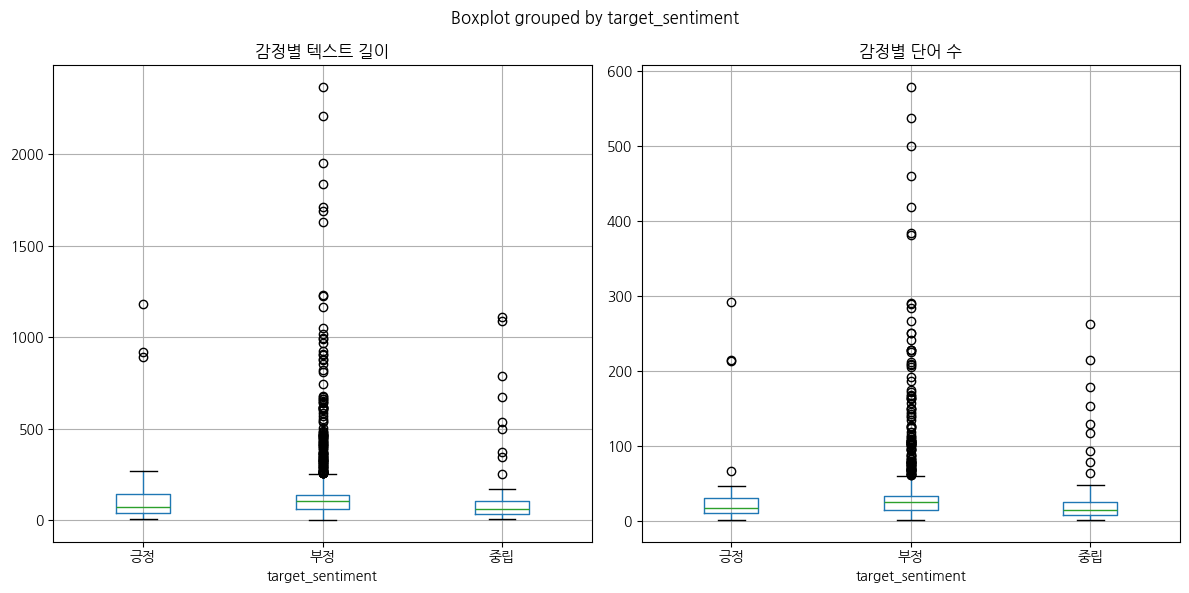

In [ ]:
# 텍스트 길이 분석
df['text_length'] = df['clean_text'].str.len()
df['word_count'] = df['clean_text'].str.split().str.len()

# 감정별 텍스트 길이 비교
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df.boxplot(column='text_length', by='target_sentiment', ax=plt.gca())
plt.title('감정별 텍스트 길이')

plt.subplot(1, 2, 2)
df.boxplot(column='word_count', by='target_sentiment', ax=plt.gca())
plt.title('감정별 단어 수')
plt.tight_layout()
plt.show()

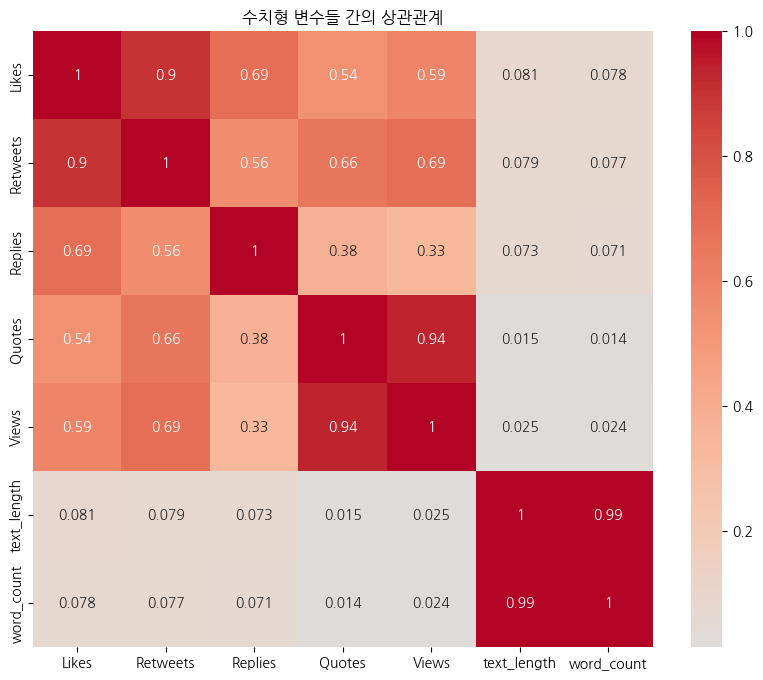

In [ ]:
# 수치형 변수들 간의 상관관계
numeric_cols = ['Likes', 'Retweets', 'Replies', 'Quotes', 'Views', 'text_length', 'word_count']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('수치형 변수들 간의 상관관계')
plt.show()

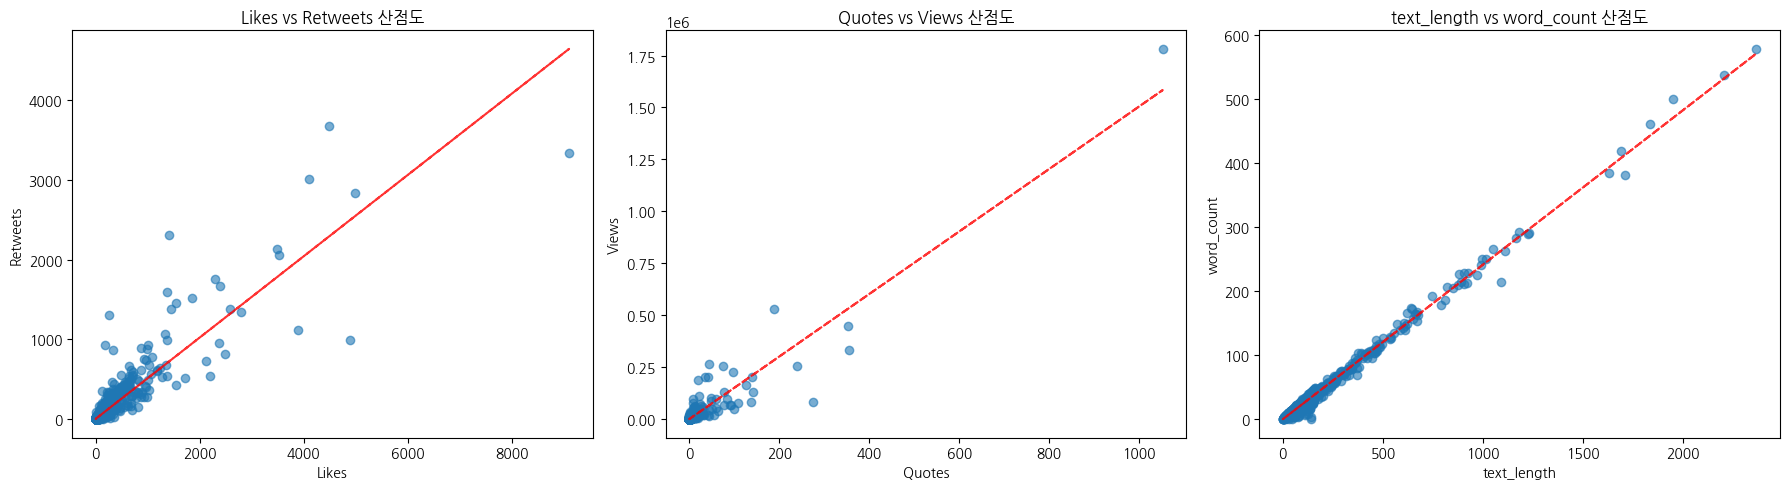

In [ ]:
# 강한 상관관계를 보이는 변수 쌍들의 산점도
strong_corr_pairs = [
    ('Likes', 'Retweets'),
    ('Quotes', 'Views'),
    ('text_length', 'word_count')
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (x, y) in enumerate(strong_corr_pairs):
    axes[i].scatter(df[x], df[y], alpha=0.6)
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)
    axes[i].set_title(f'{x} vs {y} 산점도')

    # 회귀선 추가
    z = np.polyfit(df[x], df[y], 1)
    p = np.poly1d(z)
    axes[i].plot(df[x], p(df[x]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

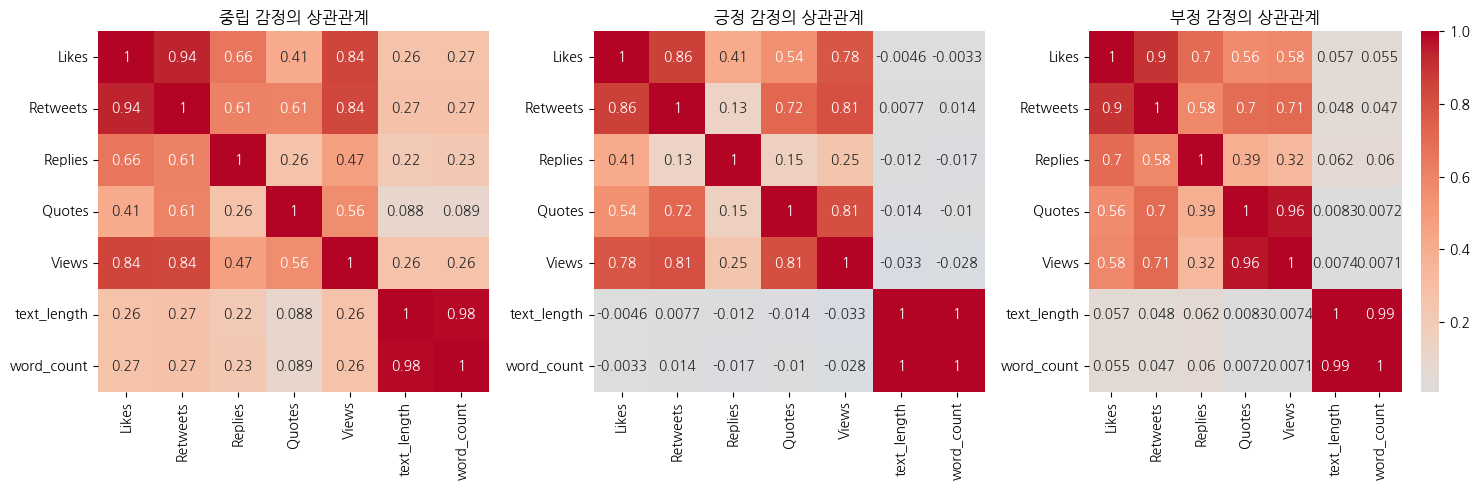

In [ ]:
# 감정별로 상관관계 매트릭스 분석
sentiments = df['target_sentiment'].unique()
fig, axes = plt.subplots(1, len(sentiments), figsize=(15, 5))

for i, sentiment in enumerate(sentiments):
    sentiment_data = df[df['target_sentiment'] == sentiment]
    corr_matrix = sentiment_data[numeric_cols].corr()

    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                ax=axes[i], cbar=i==len(sentiments)-1)
    axes[i].set_title(f'{sentiment} 감정의 상관관계')

plt.tight_layout()
plt.show()


### 참여도 기반 클러스터링

클러스터별 평균 참여도:
                          Likes     Retweets    Replies       Quotes  \
engagement_cluster                                                     
0                     28.613915    17.295797   0.693545     0.569877   
1                   4484.000000  3679.000000   0.000000  1052.000000   
2                   2545.538462  1433.346154  65.500000    95.730769   

                           Views  
engagement_cluster                
0                   1.137607e+03  
1                   1.781898e+06  
2                   1.538365e+05  


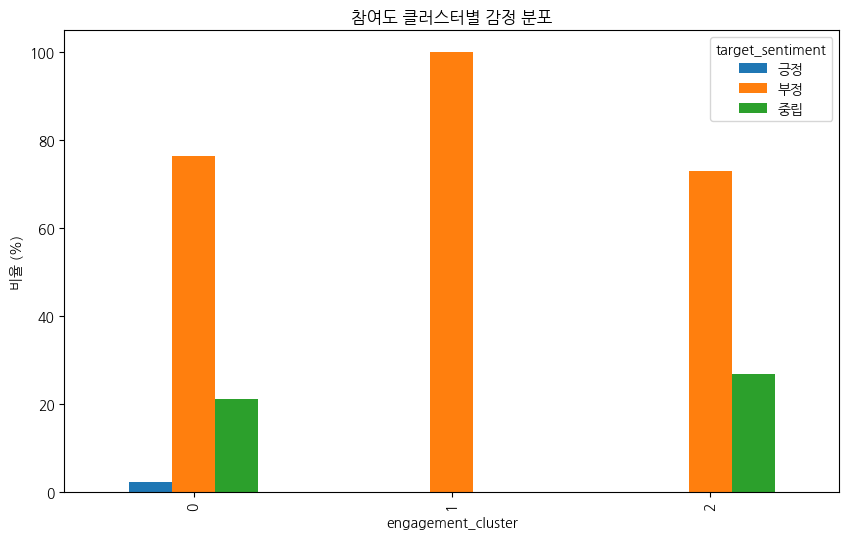

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 참여도 변수들로 클러스터링
engagement_vars = ['Likes', 'Retweets', 'Replies', 'Quotes', 'Views']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[engagement_vars])

# K-means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
df['engagement_cluster'] = kmeans.fit_predict(scaled_data)

# 클러스터별 특성 분석
cluster_summary = df.groupby('engagement_cluster')[engagement_vars].mean()
print("클러스터별 평균 참여도:")
print(cluster_summary)

# 클러스터별 감정 분포
cluster_sentiment = pd.crosstab(df['engagement_cluster'], df['target_sentiment'], normalize='index') * 100
cluster_sentiment.plot(kind='bar', figsize=(10, 6))
plt.title('참여도 클러스터별 감정 분포')
plt.ylabel('비율 (%)')
plt.show()


In [ ]:
# 높은 참여도를 보인 트윗들의 특성 분석
df['total_engagement'] = df['Likes'] + df['Retweets'] + df['Replies'] + df['Quotes']
top_engagement = df.nlargest(20, 'total_engagement')

print("고참여도 트윗의 감정 분포:")
print(top_engagement['target_sentiment'].value_counts())

print("\n고참여도 트윗의 기간별 분포:")
print(top_engagement['period'].value_counts())

고참여도 트윗의 감정 분포:
target_sentiment
부정    16
중립     4
Name: count, dtype: int64

고참여도 트윗의 기간별 분포:
period
대선토론 이후 ~ 본투표       8
윤대통령 파면 ~ 선거운동 전    7
선거운동 ~ 대선토론         4
본투표 이후              1
Name: count, dtype: int64
